In [243]:
# Import libraries
! pip install fuzzywuzzy
!pip install wordcloud

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import seaborn as sns
from wordcloud import WordCloud
import textwrap
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash

The datasets used in this python notebook have been downloaded from the AACT website. To downlaod these datasets, I used Query SQL to fetch the desired tables. Those are:
- **all_countries_20**
    - includes all interventional clinical trials carried outworldwide from 2002-2022
- **interventions**
    - includes the drugs/genes tested in the clinical trial
- **baseline_measurements**
    - includes trials that released results AND the race/ethnicity deistributions of trilas if released
- **countries**
    - includes the country name in which the trial site takes place

In [2]:
# load the data
uk_filtered = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')
interventions = pd.read_csv("https://www.dropbox.com/scl/fi/61azua3h4gpf0buh16zvm/interventions.csv?rlkey=rp5w07cwzhl27sdcoqk26dmez&dl=1")
baseline = pd.read_csv("https://www.dropbox.com/scl/fi/2thduro77e68h1uiw4ugo/baseline_measurements.csv?rlkey=gxafeel0gdz9yr8h6sd1kntib&dl=1")
countries = pd.read_csv('https://www.dropbox.com/scl/fi/bysv5hg5t2ia69suzxjo1/countries.csv?rlkey=uu3mm228whu7xjz28684jbw6g&dl=1')
all_trials = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')

/tmp/ipykernel_138/1218921963.py:2: DtypeWarning: Columns (53,68) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_filtered = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')
/tmp/ipykernel_138/1218921963.py:4: DtypeWarning: Columns (10,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline = pd.read_csv("https://www.dropbox.com/scl/fi/2thduro77e68h1uiw4ugo/baseline_measurements.csv?rlkey=gxafeel0gdz9yr8h6sd1kntib&dl=1")
/tmp/ipykernel_138/1218921963.py:6: DtypeWarning: Columns (53,68) have mixed types. Specify dtype option on import or set low_memory=False.
  all_trials = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')


In [3]:
all_trials = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')

/tmp/ipykernel_138/1037649452.py:1: DtypeWarning: Columns (53,68) have mixed types. Specify dtype option on import or set low_memory=False.
  all_trials = pd.read_csv('https://www.dropbox.com/scl/fi/16p9f92b9sxwyenvb37aj/all_countries_20.csv?rlkey=195nkhqonc9ufxahpbz2s3iwe&dl=1')


# Data Cleaning

## uk_filtered_20

In [5]:
uk_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322824 entries, 0 to 322823
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   nct_id                               322824 non-null  object 
 1   nlm_download_date_description        0 non-null       float64
 2   study_first_submitted_date           322824 non-null  object 
 3   results_first_submitted_date         54483 non-null   object 
 4   disposition_first_submitted_date     8454 non-null    object 
 5   last_update_submitted_date           322824 non-null  object 
 6   study_first_submitted_qc_date        322824 non-null  object 
 7   study_first_posted_date              322824 non-null  object 
 8   study_first_posted_date_type         322824 non-null  object 
 9   results_first_submitted_qc_date      54483 non-null   object 
 10  results_first_posted_date            54483 non-null   object 
 11  results_first

In [6]:
uk_filtered.head()

nct_id  nlm_download_date_description study_first_submitted_date  \
0  NCT04311983                            NaN                 2020-03-10   
1  NCT04841135                            NaN                 2021-04-08   
2  NCT03228355                            NaN                 2017-07-08   
3  NCT05021289                            NaN                 2021-08-18   
4  NCT03228277                            NaN                 2017-07-17   

  results_first_submitted_date disposition_first_submitted_date  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   

  last_update_submitted_date study_first_submitted_qc_date  \
0                 2023-02-21                    2020-03-16   
1                 2023-04-18                    2021-04-08   
2                 2018-06-18                    2017-07-21   
3                 2021-08-25                    2021-08-23   
4                 2019-08-25                    2017-07-20   

  study_first_posted_date study_first_posted_date_type  \
0              2020-03-17                       Actual   
1              2021-04-12                       Actual   
2              2017-07-24                       Actual   
3              2021-08-25                       Actual   
4              2017-07-24                       Actual   

  results_first_submitted_qc_date  ... plan_to_share_ipd  \
0                             NaN  ...               Yes   
1                             NaN  ...               NaN   
2                             NaN  ...         Undecided   
3                             NaN  ...                No   
4                             NaN  ...                No   

                       plan_to_share_ipd_description  \
0  The HCRL Data Center will make the datasets an...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                   created_at                  updated_at source_class  \
0   2023-05-30 00:49:23.56095   2023-05-30 00:49:23.56095        OTHER   
1  2023-05-30 00:49:24.204439  2023-05-30 00:49:24.204439        OTHER   
2  2023-05-29 01:34:59.555663  2023-05-29 01:34:59.555663        OTHER   
3  2023-05-29 01:35:01.096183  2023-05-29 01:35:01.096183        OTHER   
4  2023-05-29 01:35:01.729592  2023-05-29 01:35:01.729592        OTHER   

  delayed_posting expanded_access_nctid expanded_access_status_for_nctid  \
0             NaN                   NaN                              NaN   
1             NaN                   NaN                              NaN   
2             NaN                   NaN                              NaN   
3             NaN                   NaN                              NaN   
4             NaN                   NaN                              NaN   

  fdaaa801_violation baseline_type_units_analyzed  
0                NaN                          NaN  
1                NaN                          NaN  
2                NaN                          NaN  
3                NaN                          NaN  
4                NaN                          NaN  

[5 rows x 70 columns]

In [8]:
# drop unwanted columns
uk_filtered = uk_filtered.iloc[:, [0,20,33,34,35,37,38,39,42]]

In [9]:
uk_filtered.head()

nct_id  start_date                                        brief_title  \
0  NCT04311983  2020-03-31  Interventions to Help More Low-income Smokers ...   
1  NCT04841135  2021-06-03  Blood Microbiota Signature of Alzheimer's Disease   
2  NCT03228355  2017-05-24  Headache Inducing Effect of Cromakalim in Migr...   
3  NCT05021289  2021-02-01  Guided Imagery on the Perceived Stress Level i...   
4  NCT03228277  2017-07-17  Olmutinib Trial in T790M (+) NSCLC Patients De...   

                                      official_title          overall_status  \
0  Expanding Population-level Interventions to He...  Active, not recruiting   
1  Analysis of the Blood Signature of the Microbi...              Recruiting   
2  The Effects of Levcromakalim on Cerebral Hemod...               Completed   
3  Effect of the Practice of Guided Imagery on th...               Completed   
4  Phase II, Multicenter, Single-arm, Open-label ...               Completed   

            phase  enrollment enrollment_type  number_of_arms  
0  Not Applicable      1982.0          Actual             2.0  
1  Not Applicable       120.0     Anticipated             3.0  
2  Not Applicable        16.0          Actual             2.0  
3  Not Applicable       128.0          Actual             2.0  
4         Phase 2        25.0          Actual             1.0

In [11]:
uk_filtered["nct_id"].nunique()

322824

There were **322824** unique clinical trials carried out Worlwide from 01/01/2002 to 31/12/2022.

## interventions

In [12]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771642 entries, 0 to 771641
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 771642 non-null  int64 
 1   nct_id             771642 non-null  object
 2   intervention_type  771642 non-null  object
 3   name               771506 non-null  object
 4   description        680123 non-null  object
dtypes: int64(1), object(4)
memory usage: 29.4+ MB


In [13]:
interventions.head()

id       nct_id intervention_type  \
0  41203722  NCT01578434              Drug   
1  41203723  NCT01578434              Drug   
2  41203724  NCT01578434              Drug   
3  40903586  NCT03663959         Procedure   
4  40903587  NCT02836574        Biological   

                                    name  \
0                              Vitamin D   
1                      Calcium Carbonate   
2                  Vitamin D and Calcium   
3  Laparoscopic Pectocolpopexy procedure   
4  Renal Autologous Cell Therapy (REACT)   

                                         description  
0  Vitamin D: 6 lakh IU single im dose Calcium: 7...  
1       Calcium: 75 mg/kg calcium daily for 3 months  
2  Vitamin D: 6 lakh IU single im dose. along wit...  
3  First, the peritoneal layer above and lateral ...  
4             Autologous selected renal cells (SRC).

In [14]:
interventions.rename(columns={"name": "drug"}, inplace=True)

## baseline_measurements

In [15]:
baseline.head()

id       nct_id  result_group_id ctgov_group_code classification  \
0  96780022  NCT03386773         46152240            BG002            NaN   
1  96780023  NCT03386773         46152238            BG000            NaN   
2  96780024  NCT03386773         46152239            BG001            NaN   
3  97041131  NCT02552121         46228062            BG008            NaN   
4  97041132  NCT02552121         46228054            BG000            NaN   

  category              title description         units  \
0  English           Language         NaN  Participants   
1  Spanish           Language         NaN  Participants   
2  Spanish           Language         NaN  Participants   
3   Female  Sex: Female, Male         NaN  Participants   
4     Male  Sex: Female, Male         NaN  Participants   

              param_type  ... dispersion_type  dispersion_value  \
0  Count of Participants  ...             NaN               NaN   
1  Count of Participants  ...             NaN               NaN   
2  Count of Participants  ...             NaN               NaN   
3  Count of Participants  ...             NaN               NaN   
4  Count of Participants  ...             NaN               NaN   

  dispersion_value_num dispersion_lower_limit  dispersion_upper_limit  \
0                  NaN                    NaN                     NaN   
1                  NaN                    NaN                     NaN   
2                  NaN                    NaN                     NaN   
3                  NaN                    NaN                     NaN   
4                  NaN                    NaN                     NaN   

   explanation_of_na  number_analyzed number_analyzed_units  \
0                NaN            300.0                   NaN   
1                NaN            150.0                   NaN   
2                NaN            150.0                   NaN   
3                NaN             33.0                   NaN   
4                NaN              3.0                   NaN   

   population_description calculate_percentage  
0                     NaN                  NaN  
1                     NaN                  NaN  
2                     NaN                  NaN  
3                     NaN                  NaN  
4                     NaN                  NaN  

[5 rows x 22 columns]

In [16]:
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903040 entries, 0 to 1903039
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   nct_id                  object 
 2   result_group_id         int64  
 3   ctgov_group_code        object 
 4   classification          object 
 5   category                object 
 6   title                   object 
 7   description             object 
 8   units                   object 
 9   param_type              object 
 10  param_value             object 
 11  param_value_num         float64
 12  dispersion_type         object 
 13  dispersion_value        object 
 14  dispersion_value_num    float64
 15  dispersion_lower_limit  float64
 16  dispersion_upper_limit  float64
 17  explanation_of_na       object 
 18  number_analyzed         float64
 19  number_analyzed_units   object 
 20  population_description  object 
 21  calculate_percentage    object 

In [17]:
baseline.nct_id.nunique()

58192

In [18]:
# keep only the trials that have reported race/ethnicity to create a dataframe including only those.
race_df = baseline[baseline['title'].str.contains(r'Race|Ethnicity', case=True, regex=True)]

In [19]:
# exclude rows that have 'median' and 'mean' in param_type column
race_df = race_df[race_df['param_type'].isin(['Count of Participants', 'Count of Units', 'Number'])]

In [20]:
race_df = race_df.iloc[:, [1,5,6,8,9,10]]

In [21]:
race_df.head()

nct_id            category                title         units  \
13  NCT02552121  Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
14  NCT02552121  Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
15  NCT02552121  Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
16  NCT02552121  Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
17  NCT02552121  Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   

               param_type param_value  
13  Count of Participants         0.0  
14  Count of Participants         0.0  
15  Count of Participants         1.0  
16  Count of Participants         0.0  
17  Count of Participants         0.0

In [22]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671666 entries, 13 to 1903034
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   nct_id       671666 non-null  object
 1   category     560776 non-null  object
 2   title        671666 non-null  object
 3   units        671666 non-null  object
 4   param_type   671666 non-null  object
 5   param_value  670925 non-null  object
dtypes: object(6)
memory usage: 35.9+ MB


In [23]:
race_df.category.isna().sum()

110890

In [24]:
race_df.nct_id.nunique()

31593

In [25]:
race_df = race_df.dropna(subset=['category'])

In [26]:
race_df.nct_id.nunique()

22932

# Merging Datasets

## uk_filtered and baseline

By doing this merging, we will find out how many clinical trials have released results.

In [27]:
baseline_2 = baseline.iloc[:, [1,5,6,8,9,10]]

In [28]:
baseline_2

nct_id category                 title         units  \
0        NCT03386773  English              Language  Participants   
1        NCT03386773  Spanish              Language  Participants   
2        NCT03386773  Spanish              Language  Participants   
3        NCT02552121   Female     Sex: Female, Male  Participants   
4        NCT02552121     Male     Sex: Female, Male  Participants   
...              ...      ...                   ...           ...   
1903035  NCT03386773      NaN  Region of Enrollment  participants   
1903036  NCT03386773      NaN  Region of Enrollment  participants   
1903037  NCT03386773      NaN  Region of Enrollment  participants   
1903038  NCT03386773  English              Language  Participants   
1903039  NCT03386773  English              Language  Participants   

                    param_type param_value  
0        Count of Participants       192.0  
1        Count of Participants        55.0  
2        Count of Participants        53.0  
3        Count of Participants        29.0  
4        Count of Participants         2.0  
...                        ...         ...  
1903035                 Number       150.0  
1903036                 Number       150.0  
1903037                 Number       300.0  
1903038  Count of Participants        95.0  
1903039  Count of Participants        97.0  

[1903040 rows x 6 columns]

In [29]:
# create a boolean mask indicating whether nct_id values match
mask = uk_filtered['nct_id'].isin(baseline_2['nct_id'])

# create a new results column based on the boolean mask
uk_filtered['results'] = mask.astype(int)

In [30]:
uk_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322824 entries, 0 to 322823
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   nct_id           322824 non-null  object 
 1   start_date       322824 non-null  object 
 2   brief_title      322824 non-null  object 
 3   official_title   317093 non-null  object 
 4   overall_status   322824 non-null  object 
 5   phase            322768 non-null  object 
 6   enrollment       321483 non-null  float64
 7   enrollment_type  316064 non-null  object 
 8   number_of_arms   306314 non-null  float64
 9   results          322824 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 24.6+ MB


In [31]:
uk_filtered['results'].value_counts()

0    268630
1     54194
Name: results, dtype: int64

In [32]:
uk_filtered.to_csv('/project/world/uk_results.csv')

In [33]:
no_results = uk_filtered[uk_filtered['results']==0]

In [34]:
no_results.enrollment.sum()

413295949.0

In [35]:
uk_results_2 = uk_filtered[uk_filtered['results']==1]

In [36]:
uk_results_2['nct_id'].nunique()

54194

Out of the 322824 clinical trials, **54194** released results.

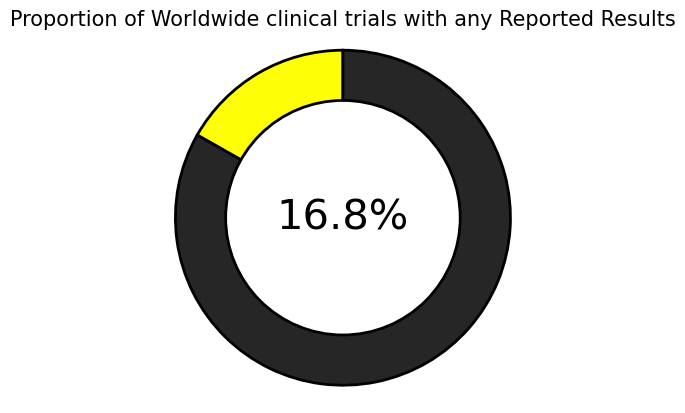

In [37]:
# Calculate the counts
count_results = uk_filtered['results'].sum()
count_no_results = len(uk_filtered) - count_results

# Calculate the proportions
total_trials = len(uk_filtered)
proportion_results = count_results / total_trials
proportion_no_results = count_no_results / total_trials

# Create the donut chart
labels = ['Results Reported', 'Results Not Reported']
sizes = [proportion_results, proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Worldwide clinical trials with any Reported Results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/world/donut_chart.png', dpi=300)

# Display the chart
plt.show()

## uk_results_2 and race_df

### Create a dataframe that includes the clinical trials that have released results and data on race/ethnicity.

In [38]:
# Merge the two dataframes based on nct_id column
merged_df = uk_results_2.merge(race_df, on='nct_id', how='left')

# Create the race_res_dum column
merged_df['race_res_dum'] = 0  # Initialize the column with 0
merged_df.loc[merged_df['category'].notna(), 'race_res_dum'] = 1  # Set 1 for rows with a match

In [39]:
merged_df.head()

nct_id  start_date                                        brief_title  \
0  NCT01654796  2013-04-30  Trial of Low Field Magnetic Stimulation Augmen...   
1  NCT01654796  2013-04-30  Trial of Low Field Magnetic Stimulation Augmen...   
2  NCT01654796  2013-04-30  Trial of Low Field Magnetic Stimulation Augmen...   
3  NCT01654796  2013-04-30  Trial of Low Field Magnetic Stimulation Augmen...   
4  NCT01654796  2013-04-30  Trial of Low Field Magnetic Stimulation Augmen...   

                                      official_title overall_status  \
0  Double-Blind, Proof-of-Concept (POC) Trial of ...      Completed   
1  Double-Blind, Proof-of-Concept (POC) Trial of ...      Completed   
2  Double-Blind, Proof-of-Concept (POC) Trial of ...      Completed   
3  Double-Blind, Proof-of-Concept (POC) Trial of ...      Completed   
4  Double-Blind, Proof-of-Concept (POC) Trial of ...      Completed   

            phase  enrollment enrollment_type  number_of_arms  results  \
0  Not Applicable        84.0          Actual             3.0        1   
1  Not Applicable        84.0          Actual             3.0        1   
2  Not Applicable        84.0          Actual             3.0        1   
3  Not Applicable        84.0          Actual             3.0        1   
4  Not Applicable        84.0          Actual             3.0        1   

                 category                title         units  \
0      Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
1      Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
2      Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
3      Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   
4  Not Hispanic or Latino  Ethnicity (NIH/OMB)  Participants   

              param_type param_value  race_res_dum  
0  Count of Participants           1             1  
1  Count of Participants           1             1  
2  Count of Participants           0             1  
3  Count of Participants           2             1  
4  Count of Participants          25             1

In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578769 entries, 0 to 578768
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   nct_id           578769 non-null  object 
 1   start_date       578769 non-null  object 
 2   brief_title      578769 non-null  object 
 3   official_title   575588 non-null  object 
 4   overall_status   578769 non-null  object 
 5   phase            578376 non-null  object 
 6   enrollment       578768 non-null  float64
 7   enrollment_type  578768 non-null  object 
 8   number_of_arms   577787 non-null  float64
 9   results          578769 non-null  int64  
 10  category         546680 non-null  object 
 11  title            546680 non-null  object 
 12  units            546680 non-null  object 
 13  param_type       546680 non-null  object 
 14  param_value      546117 non-null  object 
 15  race_res_dum     578769 non-null  int64  
dtypes: float64(2), int64(2), object(12)
me

In [41]:
merged_df['nct_id'].nunique()

54194

In [42]:
merged_df.to_csv('/project/world/uk_trials_results_all.csv')

In [43]:
# to be used in the approved_drugs_uk notebook
merged_df1 = merged_df.dropna(subset=['category'])

By dropping nulls in the "category" column, we exclude the trials that did not report the type of race or ethnicity of participants included in the trials and hence cannot be later classified.

In [44]:
merged_df1['param_value'] = merged_df1['param_value'].str.replace(',','')

/tmp/ipykernel_138/2078028877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['param_value'] = merged_df1['param_value'].str.replace(',','')


In [45]:
merged_df1['param_value'] = merged_df1['param_value'].astype(float)

/tmp/ipykernel_138/452228191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['param_value'] = merged_df1['param_value'].astype(float)


In [46]:
merged_df1['nct_id'].nunique()

22105

From the 54194 unique clinical trials that released reults, **22105** have released results on race/ethnicity.

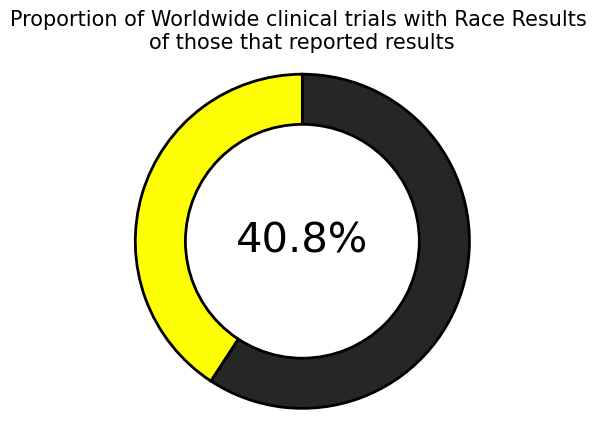

In [48]:
# Count unique nct_id values with race_res_dum
count_race_match = len(merged_df[merged_df['race_res_dum'] == 1]['nct_id'].unique())
count_no_race_match = len(merged_df[merged_df['race_res_dum'] == 0]['nct_id'].unique())

# Calculate the proportions
total_trials = len(merged_df['nct_id'].unique())
proportion_race_match = count_race_match / total_trials
proportion_no_race_match = count_no_race_match / total_trials

# Create the donut chart
labels = ['Race Match', 'No Race Match']
sizes = [proportion_race_match, proportion_no_race_match]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

# Highlight the "Race Match" section with a different color
colors_highlight = ['#fefe06', '#262626']

plt.pie(sizes, labels=None, colors=colors_highlight, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Worldwide clinical trials with Race Results \nof those that reported results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Race Match" outside the donut chart
plt.text(0, 0, f'{proportion_race_match*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/world/race_match_donut_chart.png', dpi=300)

# Display the chart
plt.show()


In [49]:
merged_df1.to_csv('/project/world/merged.csv')

In [50]:
merged_df1.results.value_counts()

1    546680
Name: results, dtype: int64

In [51]:
grouped_df = merged_df1.groupby(['nct_id', 'start_date', 'overall_status', 'phase', 'enrollment_type' , 'category', 'title', 'units', 'param_type']).sum()

/tmp/ipykernel_138/921626668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = merged_df1.groupby(['nct_id', 'start_date', 'overall_status', 'phase', 'enrollment_type' , 'category', 'title', 'units', 'param_type']).sum()


In [52]:
grouped_df.to_csv('/project/world/grouped_uk_only.csv')

In [53]:
grouped_df.reset_index(inplace=True)

In [54]:
grouped_df.nct_id.nunique()

22084

In [55]:
grouped_df.category.nunique()

1298

By reading the saved grouped.csv, we will have a better version to work with (no merged rows).
Also, using OpenAI API, I used the Chat GPT Google Docs extension and classified the "category" column into 6 different Race/Erhnicity groups (White, Black, Hispanic/ Latino, Asian, American Indian, Other/Multi) using the following prompt:

*=GPT_CLASSIFY(cell,"White/ White Heritage, Black/ Black Heritage, Hispanic/ Latino, Asian/ Asian Heritage, American Indian/ Alaska Native, Middle Eastern, Hawaiian/ Other Pacific Islander, Other, Mixed, Unknown or Not Reported")*


Some limitations:
- An input category called "other/mixed" was classified as "Other".
- there is a category called “unknown or not reported” and “missing” which is classified as “Unknown or Not collected” --> these are included in the ethnicity/race distributions of clinical trials reported results along with the other races that participated in the trial.

In [56]:
category_counts = grouped_df["category"].value_counts().reset_index()
category_counts.columns = ["category", "frequency"]

category_counts.to_csv("category_frequencies.csv", index=False)

In [60]:
df = pd.read_csv('https://www.dropbox.com/scl/fi/6btxtadh4brmk22tgcbfm/world_race_trials_chatgpt.csv?rlkey=ca5asdm6m9z22178b75rrvxjh&dl=1')

In [61]:
df.head()

nct_id  start_date overall_status    phase enrollment_type  \
0  NCT00025259  30/09/2002      Completed  Phase 3          Actual   
1  NCT00025259  30/09/2002      Completed  Phase 3          Actual   
2  NCT00025259  30/09/2002      Completed  Phase 3          Actual   
3  NCT00025259  30/09/2002      Completed  Phase 3          Actual   
4  NCT00025259  30/09/2002      Completed  Phase 3          Actual   

                           category                  race/ethnicity  \
0  American Indian or Alaska Native  American Indian/ Alaska Native   
1                             Asian           Asian/ Asian Heritage   
2         Black or African American           Black/ Black Heritage   
3                Hispanic or Latino                Hispanic/ Latino   
4                More than one race                           Mixed   

                 title         units             param_type  enrollment  \
0       Race (NIH/OMB)  Participants  Count of Participants       13872   
1       Race (NIH/OMB)  Participants  Count of Participants       13872   
2       Race (NIH/OMB)  Participants  Count of Participants       13872   
3  Ethnicity (NIH/OMB)  Participants  Count of Participants       13872   
4       Race (NIH/OMB)  Participants  Count of Participants       13872   

   number_of_arms  results  param_value  race_res_dum  
0              56        8            8             8  
1              56        8          100             8  
2              56        8          388             8  
3              56        8          518             8  
4              56        8            0             8

In [62]:
df.drop(['category','title','units','param_type'], axis =1 , inplace=True)

In [63]:
# pivot the dataframe to create new columns for each category of the 'race' column
pivoted_df = df.pivot_table(index=['nct_id', 'phase', 'start_date','enrollment_type'], columns='race/ethnicity', values=['param_value'], aggfunc='sum').reset_index()

In [64]:
pivoted_df.head()

nct_id    phase  start_date enrollment_type  \
race/ethnicity                                                     
0               NCT00025259  Phase 3  30/09/2002          Actual   
1               NCT00027846  Phase 2  31/08/2003          Actual   
2               NCT00030147  Phase 4  28/02/2002          Actual   
3               NCT00030992  Phase 2  28/02/2002          Actual   
4               NCT00033293  Phase 3  15/03/2004          Actual   

                                  param_value                        \
race/ethnicity American Indian/ Alaska Native Asian/ Asian Heritage   
0                                         8.0                 100.0   
1                                         0.0                   0.0   
2                                         0.0                   4.0   
3                                         NaN                   NaN   
4                                         0.0                   0.0   

                                                                       \
race/ethnicity Black/ Black Heritage Hawaiian/ Other Pacific Islander   
0                              388.0                             12.0   
1                                0.0                              0.0   
2                               24.0                              0.0   
3                                NaN                              NaN   
4                                0.0                              0.0   

                                                            \
race/ethnicity Hispanic/ Latino Middle Eastern Mixed Other   
0                         518.0            NaN   0.0   NaN   
1                           0.0            NaN   0.0   NaN   
2                          12.0            NaN   0.0   NaN   
3                           0.0            NaN   NaN   NaN   
4                           0.0            NaN   0.0   NaN   

                                                              
race/ethnicity Unknown or Not Reported White/ White Heritage  
0                                364.0                5546.0  
1                                  0.0                   0.0  
2                                 14.0                 198.0  
3                                  0.0                   0.0  
4                                  0.0                   0.0

In [65]:
pivoted_df.to_csv('/project/world/pivoted_df_3.csv')

I will manually now in excel rename the columns, because now i have 2 rows being the column names.

In [66]:
df_race = pd.read_csv('https://www.dropbox.com/scl/fi/5ztie1u7e78lreu214sxd/trials_drugs_race_columns_new.csv?rlkey=ndzr1o2g19ajte94rusx7b8q2&dl=1')

In [67]:
df_race.head()

nct_id    phase  start_date enrollment_type  \
0  NCT00025259  Phase 3  30/09/2002          Actual   
1  NCT00027846  Phase 2  31/08/2003          Actual   
2  NCT00030147  Phase 4  28/02/2002          Actual   
3  NCT00030992  Phase 2  28/02/2002          Actual   
4  NCT00033293  Phase 3  15/03/2004          Actual   

   American Indian/ Alaska Native  Asian/ Asian Heritage  \
0                             8.0                  100.0   
1                             0.0                    0.0   
2                             0.0                    4.0   
3                             NaN                    NaN   
4                             0.0                    0.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                  388.0                              12.0             518.0   
1                    0.0                               0.0               0.0   
2                   24.0                               0.0              12.0   
3                    NaN                               NaN               0.0   
4                    0.0                               0.0               0.0   

   Middle Eastern  Mixed  Other  Unknown or Not Reported  \
0             NaN    0.0    NaN                    364.0   
1             NaN    0.0    NaN                      0.0   
2             NaN    0.0    NaN                     14.0   
3             NaN    NaN    NaN                      0.0   
4             NaN    0.0    NaN                      0.0   

   White/ White Heritage  
0                 5546.0  
1                    0.0  
2                  198.0  
3                    0.0  
4                    0.0

In [68]:
# create a new column 'uk_races_dum' based on race columns
df_race['uk_races_dum'] = df_race[['Asian/ Asian Heritage','Black/ Black Heritage','Mixed','Other','White/ White Heritage']].apply(lambda x: int(x.notnull().all()), axis=1)

In [69]:
df_race['count'] = 1

In [70]:
df_race.nct_id.nunique()

22084

In [71]:
df_race.to_csv('/project/world/df_race_new.csv')

### Dataframe of Race/Ethnicity and Phase of trial

In [72]:
df_race_phase = df_race.groupby(['phase']).sum()

/tmp/ipykernel_138/2294493066.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race_phase = df_race.groupby(['phase']).sum()


In [73]:
df_race_phase.reset_index(inplace=True)

In [74]:
df_race_phase

phase  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0    Early Phase 1                            17.0                  242.0   
1   Not Applicable                         17249.0               184963.0   
2          Phase 1                           249.0                 7870.0   
3  Phase 1/Phase 2                          1040.0                 9530.0   
4          Phase 2                          6664.0                44414.0   
5  Phase 2/Phase 3                           866.0                 4834.0   
6          Phase 3                         34004.0               296309.0   
7          Phase 4                          2639.0                30161.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                  517.0                               5.0             363.0   
1               762653.0                           22528.0          226074.0   
2                 9083.0                             170.0            8355.0   
3                11093.0                             157.0            5145.0   
4                72234.0                            2200.0           70957.0   
5                14076.0                             158.0           13484.0   
6               221858.0                            4723.0          268020.0   
7               189424.0                            3238.0           42250.0   

   Middle Eastern    Mixed    Other  Unknown or Not Reported  \
0             0.0    115.0      0.0                    221.0   
1           191.0  49975.0  14886.0                 763238.0   
2            25.0   1026.0    194.0                   2741.0   
3             2.0   3065.0    281.0                   6814.0   
4           285.0  11260.0   2549.0                  35035.0   
5            36.0   1236.0     49.0                   7242.0   
6          1231.0  28073.0  24469.0                 215273.0   
7           215.0   9772.0   1610.0                  28871.0   

   White/ White Heritage  uk_races_dum  count  
0                 6159.0             0    145  
1              2649033.0            25   5792  
2                89479.0             5   1788  
3               121025.0             2   1483  
4               792354.0            40   6633  
5               119624.0             4    390  
6              3236978.0            52   3908  
7               479489.0            10   1945

### Dataframe of Race/Ethnicity and unique Clinical Trial IDs

In [75]:
df_race_trials = df_race.groupby(['nct_id','start_date']).sum()

/tmp/ipykernel_138/3658413480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race_trials = df_race.groupby(['nct_id','start_date']).sum()


In [76]:
df_race_trials = df_race_trials.reset_index()

In [77]:
df_race_trials['start_date'] = pd.to_datetime(df_race_trials['start_date'])

/tmp/ipykernel_138/2348154908.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_race_trials['start_date'] = pd.to_datetime(df_race_trials['start_date'])


In [78]:
# extract the year from the datetime column
df_race_trials['year'] = df_race_trials['start_date'].dt.year

In [79]:
df_race_trials.head()

nct_id start_date  American Indian/ Alaska Native  \
0  NCT00025259 2002-09-30                             8.0   
1  NCT00027846 2003-08-31                             0.0   
2  NCT00030147 2002-02-28                             0.0   
3  NCT00030992 2002-02-28                             0.0   
4  NCT00033293 2004-03-15                             0.0   

   Asian/ Asian Heritage  Black/ Black Heritage  \
0                  100.0                  388.0   
1                    0.0                    0.0   
2                    4.0                   24.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

   Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  Mixed  \
0                              12.0             518.0             0.0    0.0   
1                               0.0               0.0             0.0    0.0   
2                               0.0              12.0             0.0    0.0   
3                               0.0               0.0             0.0    0.0   
4                               0.0               0.0             0.0    0.0   

   Other  Unknown or Not Reported  White/ White Heritage  uk_races_dum  count  \
0    0.0                    364.0                 5546.0             0      1   
1    0.0                      0.0                    0.0             0      1   
2    0.0                     14.0                  198.0             0      1   
3    0.0                      0.0                    0.0             0      1   
4    0.0                      0.0                    0.0             0      1   

   year  
0  2002  
1  2003  
2  2002  
3  2002  
4  2004

### Dataframe of Race/Ethnicity and Time

In [80]:
df_race['start_date'] = pd.to_datetime(df_race['start_date'])

/tmp/ipykernel_138/2249627174.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_race['start_date'] = pd.to_datetime(df_race['start_date'])


In [81]:
# extract the year from the datetime column
df_race['year'] = df_race['start_date'].dt.year

In [82]:
df_race_time = df_race.groupby(['year']).sum()

/tmp/ipykernel_138/1026857617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race_time = df_race.groupby(['year']).sum()


In [83]:
df_race_time = df_race_time.reset_index()

In [84]:
df_race_time.head()

year  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0  2002                           341.0                 1112.0   
1  2003                            35.0                  197.0   
2  2004                            81.0                  541.0   
3  2005                           354.0                 2821.0   
4  2006                           558.0                10194.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                 2866.0                              40.0            3927.0   
1                 4410.0                              43.0             437.0   
2                 2353.0                              28.0            2604.0   
3                 6661.0                             135.0            4058.0   
4                10112.0                             193.0           12155.0   

   Middle Eastern  Mixed   Other  Unknown or Not Reported  \
0             0.0  143.0  2504.0                    818.0   
1             0.0  142.0    12.0                    427.0   
2             4.0  147.0    47.0                    739.0   
3             0.0  585.0     6.0                   4506.0   
4           297.0  922.0   634.0                   3624.0   

   White/ White Heritage  uk_races_dum  count  
0                34965.0             0     62  
1                18138.0             0    107  
2                27530.0             0    184  
3                85803.0             0    278  
4               148456.0             0    444

In [85]:
df_race_time.to_csv('/project/world/df_race_time.csv')

Our final dataframes:
- **df_race_phase**
    - includes the number of participants for each race/ethnicity by each phase of clinical trials
- **df_race_trials**
    - includes the number of participants for each race/ethnicity for each unique clinical trial nct_id
- **df_race_time**
    - includes the number of participants for each race/ethnicity by year

# Visualising the data

Let's first explore the number of new trials with results and the percent of trials reporting any race/ethnicity results by year.

In [86]:
merged_df.nct_id.nunique()

54194

We will work with the above dataframe, since it is the one which includes all the unique clinical trials that have released results (of any kind).

In [87]:
trial_results = merged_df.copy()

In [88]:
trial_results['start_date'] = pd.to_datetime(trial_results['start_date'])

In [89]:
trial_results = trial_results.groupby(['nct_id','start_date']).sum()

/tmp/ipykernel_138/789453541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trial_results = trial_results.groupby(['nct_id','start_date']).sum()


In [90]:
trial_results = trial_results.reset_index()

In [91]:
# extract the year from the datetime column
trial_results['year'] = trial_results['start_date'].dt.year

In [92]:
trial_results['nct_id'].nunique()

54194

In [93]:
trial_results.head()

nct_id start_date  enrollment  number_of_arms  results  race_res_dum  \
0  NCT00001596 2005-09-30        35.0             2.0        1             0   
1  NCT00006903 2004-08-30        67.0             1.0        1             0   
2  NCT00020722 2007-08-31         7.0             1.0        1             0   
3  NCT00022659 2002-04-30        64.0             1.0        1             0   
4  NCT00023595 2002-01-31      2136.0             4.0        1             0   

   year  
0  2005  
1  2004  
2  2007  
3  2002  
4  2002

In [94]:
trial_results.drop(['enrollment','number_of_arms','results'], axis=1, inplace=True)

In [95]:
trial_results.head()

nct_id start_date  race_res_dum  year
0  NCT00001596 2005-09-30             0  2005
1  NCT00006903 2004-08-30             0  2004
2  NCT00020722 2007-08-31             0  2007
3  NCT00022659 2002-04-30             0  2002
4  NCT00023595 2002-01-31             0  2002

In [96]:
trial_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54194 entries, 0 to 54193
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   nct_id        54194 non-null  object        
 1   start_date    54194 non-null  datetime64[ns]
 2   race_res_dum  54194 non-null  int64         
 3   year          54194 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.7+ MB


In [97]:
trial_results.nct_id.nunique()

54194

We got 54194 non-null values for nct_id, which means that we have a row for each unique clinical trial.

In [98]:
df_race_trials.head()

nct_id start_date  American Indian/ Alaska Native  \
0  NCT00025259 2002-09-30                             8.0   
1  NCT00027846 2003-08-31                             0.0   
2  NCT00030147 2002-02-28                             0.0   
3  NCT00030992 2002-02-28                             0.0   
4  NCT00033293 2004-03-15                             0.0   

   Asian/ Asian Heritage  Black/ Black Heritage  \
0                  100.0                  388.0   
1                    0.0                    0.0   
2                    4.0                   24.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

   Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  Mixed  \
0                              12.0             518.0             0.0    0.0   
1                               0.0               0.0             0.0    0.0   
2                               0.0              12.0             0.0    0.0   
3                               0.0               0.0             0.0    0.0   
4                               0.0               0.0             0.0    0.0   

   Other  Unknown or Not Reported  White/ White Heritage  uk_races_dum  count  \
0    0.0                    364.0                 5546.0             0      1   
1    0.0                      0.0                    0.0             0      1   
2    0.0                     14.0                  198.0             0      1   
3    0.0                      0.0                    0.0             0      1   
4    0.0                      0.0                    0.0             0      1   

   year  
0  2002  
1  2003  
2  2002  
3  2002  
4  2004

The above dataframe includes all the clinical trials that released race/ethnicity results.

In [100]:
trial_results_race = pd.merge(trial_results, df_race_trials, on='nct_id', how='outer')

In [101]:
trial_results_race.head()

nct_id start_date_x  race_res_dum  year_x start_date_y  \
0  NCT00001596   2005-09-30             0    2005          NaT   
1  NCT00006903   2004-08-30             0    2004          NaT   
2  NCT00020722   2007-08-31             0    2007          NaT   
3  NCT00022659   2002-04-30             0    2002          NaT   
4  NCT00023595   2002-01-31             0    2002          NaT   

   American Indian/ Alaska Native  Asian/ Asian Heritage  \
0                             NaN                    NaN   
1                             NaN                    NaN   
2                             NaN                    NaN   
3                             NaN                    NaN   
4                             NaN                    NaN   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                    NaN                               NaN               NaN   
1                    NaN                               NaN               NaN   
2                    NaN                               NaN               NaN   
3                    NaN                               NaN               NaN   
4                    NaN                               NaN               NaN   

   Middle Eastern  Mixed  Other  Unknown or Not Reported  \
0             NaN    NaN    NaN                      NaN   
1             NaN    NaN    NaN                      NaN   
2             NaN    NaN    NaN                      NaN   
3             NaN    NaN    NaN                      NaN   
4             NaN    NaN    NaN                      NaN   

   White/ White Heritage  uk_races_dum  count  year_y  
0                    NaN           NaN    NaN     NaN  
1                    NaN           NaN    NaN     NaN  
2                    NaN           NaN    NaN     NaN  
3                    NaN           NaN    NaN     NaN  
4                    NaN           NaN    NaN     NaN

In [102]:
# rename the 'year_y' column to 'race_dum' and convert nulls to 0 and non-nulls to 1
trial_results_race.rename(columns={'year_y': 'race_dum'}, inplace=True)
trial_results_race['race_dum'] = trial_results_race['race_dum'].notnull().astype(int)

In [103]:
trial_results_race.drop(['count'], axis=1, inplace=True)

In [104]:
trial_results_race['number of new trials with results'] = 1

In [105]:
trial_results_race

nct_id start_date_x  race_res_dum  year_x start_date_y  \
0      NCT00001596   2005-09-30             0    2005          NaT   
1      NCT00006903   2004-08-30             0    2004          NaT   
2      NCT00020722   2007-08-31             0    2007          NaT   
3      NCT00022659   2002-04-30             0    2002          NaT   
4      NCT00023595   2002-01-31             0    2002          NaT   
...            ...          ...           ...     ...          ...   
54189  NCT05607147   2021-01-26             7    2021   2021-01-26   
54190  NCT05655377   2021-03-01             0    2021          NaT   
54191  NCT05736861   2021-06-08             9    2021   2021-08-06   
54192  NCT05736874   2021-08-06            39    2021   2021-06-08   
54193  NCT05751629   2018-11-15            10    2018   2018-11-15   

       American Indian/ Alaska Native  Asian/ Asian Heritage  \
0                                 NaN                    NaN   
1                                 NaN                    NaN   
2                                 NaN                    NaN   
3                                 NaN                    NaN   
4                                 NaN                    NaN   
...                               ...                    ...   
54189                             0.0                    3.0   
54190                             NaN                    NaN   
54191                             0.0                    0.0   
54192                             0.0                    0.0   
54193                             0.0                    1.0   

       Black/ Black Heritage  Hawaiian/ Other Pacific Islander  \
0                        NaN                               NaN   
1                        NaN                               NaN   
2                        NaN                               NaN   
3                        NaN                               NaN   
4                        NaN                               NaN   
...                      ...                               ...   
54189                    3.0                               0.0   
54190                    NaN                               NaN   
54191                    0.0                               0.0   
54192                    0.0                               0.0   
54193                    2.0                               0.0   

       Hispanic/ Latino  Middle Eastern  Mixed  Other  \
0                   NaN             NaN    NaN    NaN   
1                   NaN             NaN    NaN    NaN   
2                   NaN             NaN    NaN    NaN   
3                   NaN             NaN    NaN    NaN   
4                   NaN             NaN    NaN    NaN   
...                 ...             ...    ...    ...   
54189               0.0             0.0    0.0    0.0   
54190               NaN             NaN    NaN    NaN   
54191             326.0             0.0    0.0    0.0   
54192               0.0             0.0    0.0    0.0   
54193               5.0             0.0    0.0    0.0   

       Unknown or Not Reported  White/ White Heritage  uk_races_dum  race_dum  \
0                          NaN                    NaN           NaN         0   
1                          NaN                    NaN           NaN         0   
2                          NaN                    NaN           NaN         0   
3                          NaN                    NaN           NaN         0   
4                          NaN                    NaN           NaN         0   
...                        ...                    ...           ...       ...   
54189                      0.0                    4.0           0.0         1   
54190                      NaN                    NaN           NaN         0   
54191                      0.0                 2856.0           0.0         1   
54192                      0.0                    0.0           0.0         1   
54193                      6.0   

In [106]:
trial_results_race_year = trial_results_race.groupby(['year_x']).sum().reset_index()

/tmp/ipykernel_138/3648735719.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trial_results_race_year = trial_results_race.groupby(['year_x']).sum().reset_index()


In [107]:
trial_results_race_year.rename(columns={'year_x': 'year'}, inplace=True)

In [108]:
trial_results_race_year.head()

year  race_res_dum  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0  2002          1104                           341.0                 1112.0   
1  2003          2260                            35.0                  197.0   
2  2004          3666                            81.0                  541.0   
3  2005          5548                           354.0                 2821.0   
4  2006          9351                           558.0                10194.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                 2866.0                              40.0            3927.0   
1                 4410.0                              43.0             437.0   
2                 2353.0                              28.0            2604.0   
3                 6661.0                             135.0            4058.0   
4                10112.0                             193.0           12155.0   

   Middle Eastern  Mixed   Other  Unknown or Not Reported  \
0             0.0  143.0  2504.0                    818.0   
1             0.0  142.0    12.0                    427.0   
2             4.0  147.0    47.0                    739.0   
3             0.0  585.0     6.0                   4506.0   
4           297.0  922.0   634.0                   3624.0   

   White/ White Heritage  uk_races_dum  race_dum  \
0                34965.0           0.0        62   
1                18138.0           0.0       107   
2                27530.0           0.0       184   
3                85803.0           0.0       278   
4               148456.0           0.0       444   

   number of new trials with results  
0                                413  
1                                740  
2                               1138  
3                               1735  
4                               2707

In [109]:
# Convert "year" column to integers
trial_results_race_year['year'] = trial_results_race_year['year'].astype(int)

In [110]:
def calculate_percent_reporting_race(df):
    df['percent of trials reporting any race/ethnicity data'] = round((df['race_dum'] / df['number of new trials with results']) * 100, 2)
    return df

def calculate_percent_reporting_all(df):
    df['percent of trials reporting any race/ethnicity data'] = round((df['race_dum'] / df['number of new trials with results']) * 100, 2)
    df['percent of trials reporting All UK Race Groups'] = round((df['uk_races_dum'] / df['race_dum']) * 100, 2)
    return df

In [111]:
calculate_percent_reporting_race(trial_results_race_year)
calculate_percent_reporting_all(trial_results_race_year)

year  race_res_dum  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0   2002          1104                           341.0                 1112.0   
1   2003          2260                            35.0                  197.0   
2   2004          3666                            81.0                  541.0   
3   2005          5548                           354.0                 2821.0   
4   2006          9351                           558.0                10194.0   
5   2007         11502                           408.0                 8691.0   
6   2008         14049                          1369.0                18172.0   
7   2009         19666                           956.0                11299.0   
8   2010         22853                          2431.0                16806.0   
9   2011         26773                          3459.0                40511.0   
10  2012         31698                          3549.0                71505.0   
11  2013         40534                          6627.0               101274.0   
12  2014         47867                          4997.0                34335.0   
13  2015         61089                          4607.0                40320.0   
14  2016         64060                          5406.0                72413.0   
15  2017         65071                          5731.0                60367.0   
16  2018         53744                          5903.0                32631.0   
17  2019         35395                          1976.0                26173.0   
18  2020         23223                         13033.0                24036.0   
19  2021          6922                           905.0                 4867.0   
20  2022           305                             2.0                   58.0   

    Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                  2866.0                              40.0            3927.0   
1                  4410.0                              43.0             437.0   
2                  2353.0                              28.0            2604.0   
3                  6661.0                             135.0            4058.0   
4                 10112.0                             193.0           12155.0   
5                 12250.0                             225.0            6890.0   
6                 15919.0                             463.0            8493.0   
7                 18020.0                             434.0           16067.0   
8                 25283.0                             346.0           24620.0   
9                 53402.0                            5158.0           16160.0   
10                44598.0                            9126.0           37961.0   
11               400594.0                            4132.0          126960.0   
12                69859.0                            1458.0           52099.0   
13                66979.0                            1100.0           43022.0   
14               139597.0                            4704.0           76845.0   
15               237546.0                            1852.0           74408.0   
16                88793.0                            2261.0           37920.0   
17                30413.0                             523.0           24615.0   
18                46209.0                             844.0           56442.0   
19                 5019.0                             114.0            8819.0   
20                   55.0                               0.0             146.0   

    Middle Eastern    Mixed   Other  Unknown or Not Reported  \
0              0.0    143.0  2504.0                    818.0   
1              0.0    142.0    12.0                    427.0   
2              4.0    147.0    47.0                    739.0   
3              0.0    585.0     6.0                   4506.0   
4            297.0    922.0   634.0                   3624.0   
5            172.0    885.0   184.0                   

In [112]:
trial_results_race_year.head()

year  race_res_dum  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0  2002          1104                           341.0                 1112.0   
1  2003          2260                            35.0                  197.0   
2  2004          3666                            81.0                  541.0   
3  2005          5548                           354.0                 2821.0   
4  2006          9351                           558.0                10194.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                 2866.0                              40.0            3927.0   
1                 4410.0                              43.0             437.0   
2                 2353.0                              28.0            2604.0   
3                 6661.0                             135.0            4058.0   
4                10112.0                             193.0           12155.0   

   Middle Eastern  Mixed   Other  Unknown or Not Reported  \
0             0.0  143.0  2504.0                    818.0   
1             0.0  142.0    12.0                    427.0   
2             4.0  147.0    47.0                    739.0   
3             0.0  585.0     6.0                   4506.0   
4           297.0  922.0   634.0                   3624.0   

   White/ White Heritage  uk_races_dum  race_dum  \
0                34965.0           0.0        62   
1                18138.0           0.0       107   
2                27530.0           0.0       184   
3                85803.0           0.0       278   
4               148456.0           0.0       444   

   number of new trials with results  \
0                                413   
1                                740   
2                               1138   
3                               1735   
4                               2707   

   percent of trials reporting any race/ethnicity data  \
0                                              15.01     
1                                              14.46     
2                                              16.17     
3                                              16.02     
4                                              16.40     

   percent of trials reporting All UK Race Groups  
0                                             0.0  
1                                             0.0  
2                                             0.0  
3                                             0.0  
4                                             0.0

In [116]:
table_website = trial_results_race_year.iloc[:,[0,13,14]]
table_website.to_csv('/project/world/website_line_graph.csv')

In [117]:
table_1 = trial_results_race_year.iloc[:,[0,14,15,16]]

In [118]:
table_1

year  number of new trials with results  \
0   2002                                413   
1   2003                                740   
2   2004                               1138   
3   2005                               1735   
4   2006                               2707   
5   2007                               3417   
6   2008                               3813   
7   2009                               3962   
8   2010                               3814   
9   2011                               3774   
10  2012                               3716   
11  2013                               3925   
12  2014                               3907   
13  2015                               3981   
14  2016                               3624   
15  2017                               3388   
16  2018                               2733   
17  2019                               1897   
18  2020                               1082   
19  2021                                398   
20  2022                                 30   

    percent of trials reporting any race/ethnicity data  \
0                                               15.01     
1                                               14.46     
2                                               16.17     
3                                               16.02     
4                                               16.40     
5                                               15.31     
6                                               17.10     
7                                               21.68     
8                                               24.80     
9                                               29.65     
10                                              33.48     
11                                              41.66     
12                                              48.35     
13                                              59.76     
14                                              68.57     
15                                              75.50     
16                                              75.78     
17                                              78.02     
18                                              79.39     
19                                              73.37     
20                                              60.00     

    percent of trials reporting All UK Race Groups  
0                                             0.00  
1                                             0.00  
2                                             0.00  
3                                             0.00  
4                                             0.00  
5                                             0.38  
6                                             0.31  
7                                             0.23  
8                                             0.21  
9                                             0.63  
10                                            0.80  
11                                            0.92  
12                                            0.26  
13                                            0.92  
14                                            0.76  
15                                            0.74  
16                                            0.87  
17                                            0.68  
18                                            0.35  
19                                            0.68  
20                                            0.00

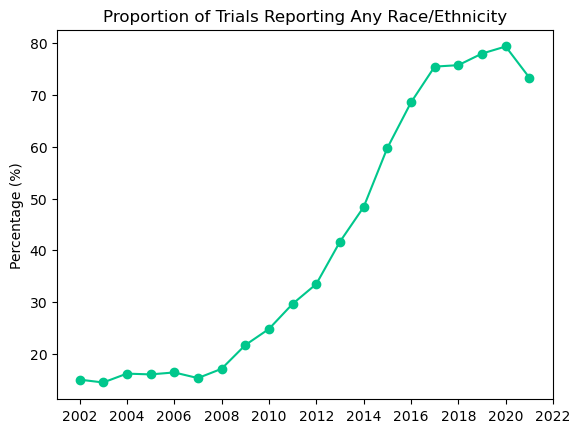

In [119]:
import matplotlib.pyplot as plt

# Filter the data until 2021
table_1_filtered = table_1[table_1['year'] <= 2021]

# Plot the line graphs
plt.plot(table_1_filtered['year'], table_1_filtered['percent of trials reporting any race/ethnicity data'], marker='o', color='#00C78C', label='Trials Reporting Any Race/Ethnicity')
# plt.plot(table_1_filtered['year'], table_1_filtered['percent of trials reporting All UK Race Groups'], marker='o', color='#7171C6', label='Trials Reporting All UK Race Groups')

# Set the labels and title
plt.ylabel('Percentage (%)')
plt.title('Proportion of Trials Reporting Any Race/Ethnicity')

# Set the x-axis tick positions and labels
plt.xticks(range(table_1_filtered['year'].min(), table_1_filtered['year'].max()+2, 2))

# Add a legend
# plt.legend()

# Save the chart as an image file
plt.savefig('/project/world/reporting_line_graph.png', dpi=300)

# Display the plot
plt.show()

In [120]:
trial_results_race_mmyy = trial_results_race.copy()

In [121]:
trial_results_race_mmyy.sort_values(by='start_date_x')

nct_id start_date_x  race_res_dum  year_x start_date_y  \
127    NCT00053989   2002-01-29             7    2002   2002-01-29   
64     NCT00045942   2002-01-30             0    2002          NaT   
11871  NCT00784979   2002-01-31             0    2002          NaT   
24     NCT00038103   2002-01-31             0    2002          NaT   
1759   NCT00200057   2002-01-31             0    2002          NaT   
...            ...          ...           ...     ...          ...   
54160  NCT05282004   2022-05-16             7    2022   2022-05-16   
54168  NCT05306977   2022-05-19            10    2022   2022-05-19   
54124  NCT05128682   2022-05-24            10    2022   2022-05-24   
54172  NCT05340244   2022-06-01             0    2022          NaT   
54154  NCT05249569   2022-11-04             7    2022   2022-04-11   

       American Indian/ Alaska Native  Asian/ Asian Heritage  \
127                               0.0                    1.0   
64                                NaN                    NaN   
11871                             NaN                    NaN   
24                                NaN                    NaN   
1759                              NaN                    NaN   
...                               ...                    ...   
54160                             0.0                    0.0   
54168                             0.0                    0.0   
54124                             0.0                    0.0   
54172                             NaN                    NaN   
54154                             0.0                    0.0   

       Black/ Black Heritage  Hawaiian/ Other Pacific Islander  \
127                      0.0                               0.0   
64                       NaN                               NaN   
11871                    NaN                               NaN   
24                       NaN                               NaN   
1759                     NaN                               NaN   
...                      ...                               ...   
54160                    0.0                               0.0   
54168                    1.0                               0.0   
54124                    0.0                               0.0   
54172                    NaN                               NaN   
54154                    0.0                               0.0   

       Hispanic/ Latino  Middle Eastern  Mixed  Other  \
127                 0.0             0.0    0.0    0.0   
64                  NaN             NaN    NaN    NaN   
11871               NaN             NaN    NaN    NaN   
24                  NaN             NaN    NaN    NaN   
1759                NaN             NaN    NaN    NaN   
...                 ...             ...    ...    ...   
54160               0.0             0.0    0.0    0.0   
54168               0.0             0.0    0.0    0.0   
54124               0.0             0.0    0.0    0.0   
54172               NaN             NaN    NaN    NaN   
54154               0.0             0.0    0.0    0.0   

       Unknown or Not Reported  White/ White Heritage  uk_races_dum  race_dum  \
127                        0.0                   40.0           0.0         1   
64                         NaN                    NaN           NaN         0   
11871                      NaN                    NaN           NaN         0   
24                         NaN                    NaN           NaN         0   
1759                       NaN                    NaN           NaN         0   
...                        ...                    ...           ...       ...   
54160                      0.0                   36.0           0.0         1   
54168                      1.0                    8.0           0.0         1   
54124                      0.0                    8.0           0.0         1   
54172                      NaN                    NaN           NaN         0   
54154                      0.0   

In [122]:
# Extract and combine month and year into a single column
trial_results_race_mmyy['month_year'] = trial_results_race_mmyy['start_date_x'].dt.strftime('%B %Y')

In [123]:
trial_results_race_mmyy.head()

nct_id start_date_x  race_res_dum  year_x start_date_y  \
0  NCT00001596   2005-09-30             0    2005          NaT   
1  NCT00006903   2004-08-30             0    2004          NaT   
2  NCT00020722   2007-08-31             0    2007          NaT   
3  NCT00022659   2002-04-30             0    2002          NaT   
4  NCT00023595   2002-01-31             0    2002          NaT   

   American Indian/ Alaska Native  Asian/ Asian Heritage  \
0                             NaN                    NaN   
1                             NaN                    NaN   
2                             NaN                    NaN   
3                             NaN                    NaN   
4                             NaN                    NaN   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                    NaN                               NaN               NaN   
1                    NaN                               NaN               NaN   
2                    NaN                               NaN               NaN   
3                    NaN                               NaN               NaN   
4                    NaN                               NaN               NaN   

   Middle Eastern  Mixed  Other  Unknown or Not Reported  \
0             NaN    NaN    NaN                      NaN   
1             NaN    NaN    NaN                      NaN   
2             NaN    NaN    NaN                      NaN   
3             NaN    NaN    NaN                      NaN   
4             NaN    NaN    NaN                      NaN   

   White/ White Heritage  uk_races_dum  race_dum  \
0                    NaN           NaN         0   
1                    NaN           NaN         0   
2                    NaN           NaN         0   
3                    NaN           NaN         0   
4                    NaN           NaN         0   

   number of new trials with results      month_year  
0                                  1  September 2005  
1                                  1     August 2004  
2                                  1     August 2007  
3                                  1      April 2002  
4                                  1    January 2002

In [124]:
trial_results_race_mmyy.drop(['start_date_x','year_x','start_date_y'], axis=1, inplace=True)

In [125]:
trial_results_race_mmyy = trial_results_race_mmyy.groupby(['month_year']).sum()

/tmp/ipykernel_138/2200017311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trial_results_race_mmyy = trial_results_race_mmyy.groupby(['month_year']).sum()


In [126]:
trial_results_race_mmyy = trial_results_race_mmyy.reset_index()

In [127]:
trial_results_race_mmyy.head()

month_year  race_res_dum  American Indian/ Alaska Native  \
0  April 2002            48                             0.0   
1  April 2003           187                             0.0   
2  April 2004           247                            11.0   
3  April 2005           389                            36.0   
4  April 2006           817                            93.0   

   Asian/ Asian Heritage  Black/ Black Heritage  \
0                    6.0                   13.0   
1                    2.0                   38.0   
2                   24.0                  144.0   
3                  279.0                  447.0   
4                 1155.0                 2561.0   

   Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  Mixed  \
0                               1.0               3.0             0.0   16.0   
1                               4.0             142.0             0.0    2.0   
2                              11.0             203.0             0.0    0.0   
3                              26.0            1402.0             0.0    4.0   
4                             101.0             173.0            10.0   63.0   

   Other  Unknown or Not Reported  White/ White Heritage  uk_races_dum  \
0    0.0                      0.0                  219.0           0.0   
1    0.0                     84.0                 1236.0           0.0   
2    0.0                    120.0                 2533.0           0.0   
3    0.0                   1064.0                10319.0           0.0   
4   74.0                    770.0                22874.0           0.0   

   race_dum  number of new trials with results  
0         4                                 29  
1         5                                 58  
2        15                                 88  
3        21                                112  
4        36                                197

In [128]:
calculate_percent_reporting_race(trial_results_race_mmyy)
calculate_percent_reporting_all(trial_results_race_mmyy)

month_year  race_res_dum  American Indian/ Alaska Native  \
0        April 2002            48                             0.0   
1        April 2003           187                             0.0   
2        April 2004           247                            11.0   
3        April 2005           389                            36.0   
4        April 2006           817                            93.0   
..              ...           ...                             ...   
242  September 2017          5693                           220.0   
243  September 2018          4467                           253.0   
244  September 2019          2994                           221.0   
245  September 2020          2350                          8320.0   
246  September 2021           407                             6.0   

     Asian/ Asian Heritage  Black/ Black Heritage  \
0                      6.0                   13.0   
1                      2.0                   38.0   
2                     24.0                  144.0   
3                    279.0                  447.0   
4                   1155.0                 2561.0   
..                     ...                    ...   
242                 2381.0                20933.0   
243                 1693.0                 2356.0   
244                 1920.0                 1911.0   
245                 5202.0                17830.0   
246                  234.0                   94.0   

     Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  \
0                                 1.0               3.0             0.0   
1                                 4.0             142.0             0.0   
2                                11.0             203.0             0.0   
3                                26.0            1402.0             0.0   
4                               101.0             173.0            10.0   
..                                ...               ...             ...   
242                              63.0            5422.0             0.0   
243                              53.0            3076.0             2.0   
244                              16.0             921.0             4.0   
245                             224.0           10472.0            36.0   
246                               4.0             173.0             0.0   

      Mixed  Other  Unknown or Not Reported  White/ White Heritage  \
0      16.0    0.0                      0.0                  219.0   
1       2.0    0.0                     84.0                 1236.0   
2       0.0    0.0                    120.0                 2533.0   
3       4.0    0.0                   1064.0                10319.0   
4      63.0   74.0                    770.0                22874.0   
..      ...    ...                      ...                    ...   
242   423.0  103.0                  67987.0                51378.0   
243   252.0   10.0                   4766.0                44630.0   
244   609.0   13.0                    672.0                19130.0   
245  5106.0   36.0                   4363.0               294194.0   
246    56.0    7.0                     14.0                 1657.0   

     uk_races_dum  race_dum  number of new trials with results  \
0             0.0         4                                 29   
1             0.0         5                                 58   
2             0.0        15                                 88   
3             0.0        21                                112   
4             0.0        36                                197   
..            ...       ...                                ...   
242           1.0       211                                281   
243           0.0       174                                216   
244           2.0       120                                148   
245           1.0        91                                112   
246           1.0        18                                 20   

     per

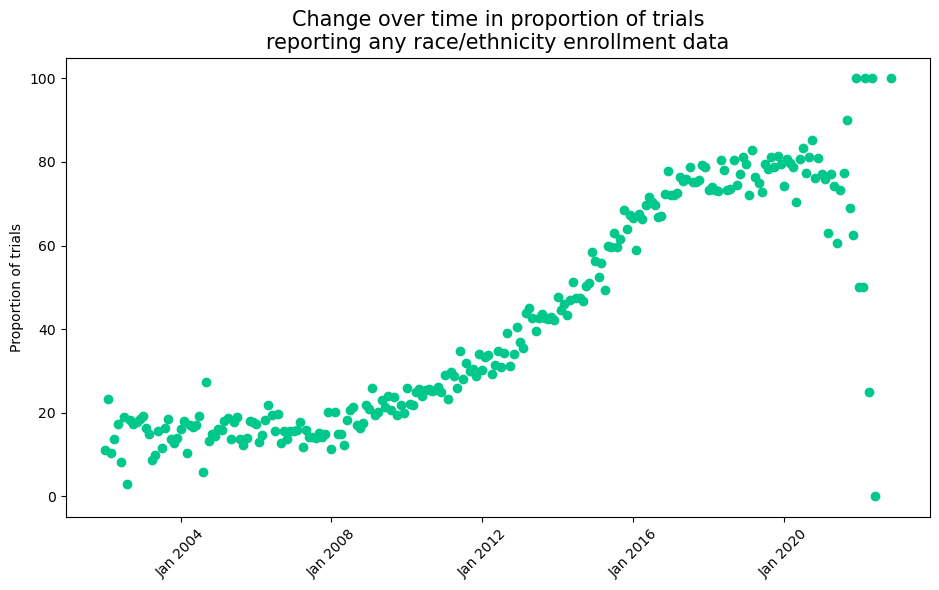

In [129]:
# Convert 'month_year' column to datetime format
trial_results_race_mmyy['month_year'] = pd.to_datetime(trial_results_race_mmyy['month_year'], format='%B %Y')

# Set the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the dot diagrams
ax.plot(trial_results_race_mmyy['month_year'], trial_results_race_mmyy['percent of trials reporting any race/ethnicity data'], 'o', color='#00C78C', label='Trials Reporting Any Race/Ethnicity')
# ax.plot(trial_results_race_mmyy['month_year'], trial_results_race_mmyy['percent of trials reporting All UK Race Groups'], 'o', color='#7171C6', label='Trials Reporting All UK Race Groups')

# Set the labels and title
# ax.set_xlabel('Month and Year')
ax.set_ylabel('Proportion of trials')

# Add a two-line title
title_line1 = 'Change over time in proportion of trials'
title_line2 = 'reporting any race/ethnicity enrollment data'
ax.set_title(f'{title_line1}\n{title_line2}', fontsize=15)

# Add a legend
# ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Format x-axis ticks to display month and year
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/world/scatter_graphs_reporting.png', dpi=300)

# Display the plot
plt.show()

## Plotting race/ethnicity participation over time by race/ethnicity

In [130]:
df_dummies =  trial_results_race.copy()

# Create dummy variables for race columns
race_columns = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed','Unknown or Not Reported']

# Convert zeros to null for race columns
df_dummies[race_columns] = df_dummies[race_columns].replace(0, np.nan)

# Convert null values to 0 and non-null values to 1 for race columns
df_dummies[race_columns] = df_dummies[race_columns].notnull().astype(int).fillna(0)

df_dummies

nct_id start_date_x  race_res_dum  year_x start_date_y  \
0      NCT00001596   2005-09-30             0    2005          NaT   
1      NCT00006903   2004-08-30             0    2004          NaT   
2      NCT00020722   2007-08-31             0    2007          NaT   
3      NCT00022659   2002-04-30             0    2002          NaT   
4      NCT00023595   2002-01-31             0    2002          NaT   
...            ...          ...           ...     ...          ...   
54189  NCT05607147   2021-01-26             7    2021   2021-01-26   
54190  NCT05655377   2021-03-01             0    2021          NaT   
54191  NCT05736861   2021-06-08             9    2021   2021-08-06   
54192  NCT05736874   2021-08-06            39    2021   2021-06-08   
54193  NCT05751629   2018-11-15            10    2018   2018-11-15   

       American Indian/ Alaska Native  Asian/ Asian Heritage  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
54189                               0                      1   
54190                               0                      0   
54191                               0                      0   
54192                               0                      0   
54193                               0                      1   

       Black/ Black Heritage  Hawaiian/ Other Pacific Islander  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   
...                      ...                               ...   
54189                      1                                 0   
54190                      0                                 0   
54191                      0                                 0   
54192                      0                                 0   
54193                      1                                 0   

       Hispanic/ Latino  Middle Eastern  Mixed  Other  \
0                     0               0      0      0   
1                     0               0      0      0   
2                     0               0      0      0   
3                     0               0      0      0   
4                     0               0      0      0   
...                 ...             ...    ...    ...   
54189                 0               0      0      0   
54190                 0               0      0      0   
54191                 1               0      0      0   
54192                 0               0      0      0   
54193                 1               0      0      0   

       Unknown or Not Reported  White/ White Heritage  uk_races_dum  race_dum  \
0                            0                      0           NaN         0   
1                            0                      0           NaN         0   
2                            0                      0           NaN         0   
3                            0                      0           NaN         0   
4                            0                      0           NaN         0   
...                        ...                    ...           ...       ...   
54189                        0                      1           0.0         1   
54190                        0                      0           NaN         0   
54191                        0                      1           0.0         1   
54192                        0                      0           0.0         1   
54193                        1   

In [131]:
df_dummies['month_year'] = df_dummies['start_date_x'].dt.strftime('%B %Y')
df_dummies = df_dummies.groupby(['month_year']).sum()
df_dummies.reset_index()

/tmp/ipykernel_138/1909728300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dummies = df_dummies.groupby(['month_year']).sum()


month_year  race_res_dum  year_x  American Indian/ Alaska Native  \
0        April 2002            48   58058                               0   
1        April 2003           187  116174                               0   
2        April 2004           247  176352                               5   
3        April 2005           389  224560                               1   
4        April 2006           817  395182                               5   
..              ...           ...     ...                             ...   
242  September 2017          5693  566777                              33   
243  September 2018          4467  435888                              15   
244  September 2019          2994  298812                              16   
245  September 2020          2350  226240                               7   
246  September 2021           407   40420                               2   

     Asian/ Asian Heritage  Black/ Black Heritage  \
0                        3                      3   
1                        1                      3   
2                        4                      6   
3                        3                      5   
4                       11                     18   
..                     ...                    ...   
242                     63                     85   
243                     40                     60   
244                     41                     53   
245                     29                     28   
246                      4                      7   

     Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  \
0                                   1                 2               0   
1                                   1                 4               0   
2                                   2                 8               0   
3                                   2                 3               0   
4                                   4                10               2   
..                                ...               ...             ...   
242                                17                76               0   
243                                12                47               1   
244                                 6                36               3   
245                                 8                29               1   
246                                 1                 5               0   

     Mixed  Other  Unknown or Not Reported  White/ White Heritage  \
0        2      0                        0                      3   
1        1      0                        2                      4   
2        0      0                        3                      9   
3        1      0                        4                      8   
4        4      2                       10                     23   
..     ...    ...                      ...                    ...   
242     37      7                       56                    121   
243     22      2                       42                     87   
244     26      3                       31                     76   
245     11      4                       24                     49   
246      5      1                        2                      9   

     uk_races_dum  race_dum  number of new trials with results  
0             0.0         4                                 29  
1             0.0         5                                 58  
2             0.0        15                                 88  
3             0.0        21                                112  
4             0.0        36                                197  
..            ...       ...                                ...  
242           1.0       211                                281  
243           0.0       174                                216  
244           2.0       120                                148  
245           1.0        91                                112  
24

In [132]:
# Calculate the proportion of trials reporting each ethnicity over time
ethnicity_columns = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']
for race in ethnicity_columns:
    df_dummies[race + '_ratio'] = round((df_dummies[race] / df_dummies['number of new trials with results'])*100,2)

In [133]:
df_dummies.drop(['year_x'], axis=1,inplace=True)

In [134]:
df_dummies.sort_values(by='month_year')

race_res_dum  American Indian/ Alaska Native  \
month_year                                                     
April 2002                48                               0   
April 2003               187                               0   
April 2004               247                               5   
April 2005               389                               1   
April 2006               817                               5   
...                      ...                             ...   
September 2017          5693                              33   
September 2018          4467                              15   
September 2019          2994                              16   
September 2020          2350                               7   
September 2021           407                               2   

                Asian/ Asian Heritage  Black/ Black Heritage  \
month_year                                                     
April 2002                          3                      3   
April 2003                          1                      3   
April 2004                          4                      6   
April 2005                          3                      5   
April 2006                         11                     18   
...                               ...                    ...   
September 2017                     63                     85   
September 2018                     40                     60   
September 2019                     41                     53   
September 2020                     29                     28   
September 2021                      4                      7   

                Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
month_year                                                           
April 2002                                     1                 2   
April 2003                                     1                 4   
April 2004                                     2                 8   
April 2005                                     2                 3   
April 2006                                     4                10   
...                                          ...               ...   
September 2017                                17                76   
September 2018                                12                47   
September 2019                                 6                36   
September 2020                                 8                29   
September 2021                                 1                 5   

                Middle Eastern  Mixed  Other  Unknown or Not Reported  ...  \
month_year                                                             ...   
April 2002                   0      2      0                        0  ...   
April 2003                   0      1      0                        2  ...   
April 2004                   0      0      0                        3  ...   
April 2005                   0      1      0                        4  ...   
April 2006                   2      4      2                       10  ...   
...                        ...    ...    ...                      ...  ...   
September 2017               0     37      7                       56  ...   
September 2018               1     22      2                       42  ...   
September 2019               3     26      3                       31  ...   
September 2020               1     11      4                       24  ...   
September 2021               0      5      1                        2  ...   

                number of new trials with results  \
month_year                                          
April 2002                                     29   
April 2003                                     58   
April 2004                                     88   
April 2005                                    112   
April 2006                                    197   
...                                           ...   


In [135]:
df_dummies.reset_index(inplace=True)

In [136]:
# Convert 'month_year' column to datetime object
df_dummies['month_year'] = pd.to_datetime(df_dummies['month_year'])

# Sort the DataFrame by 'month_year'
df_dummies = df_dummies.sort_values('month_year')

In [137]:
df_dummies

month_year  race_res_dum  American Indian/ Alaska Native  \
82  2002-01-01            38                               0   
61  2002-02-01           150                               0   
144 2002-03-01            87                               0   
0   2002-04-01            48                               0   
165 2002-05-01            91                               0   
..         ...           ...                             ...   
164 2022-03-01            75                               1   
20  2022-04-01             9                               0   
185 2022-05-01            57                               0   
143 2022-06-01             0                               0   
206 2022-11-01             7                               0   

     Asian/ Asian Heritage  Black/ Black Heritage  \
82                       2                      1   
61                       2                      4   
144                      1                      1   
0                        3                      3   
165                      0                      1   
..                     ...                    ...   
164                      1                      1   
20                       0                      0   
185                      0                      1   
143                      0                      0   
206                      0                      0   

     Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  \
82                                  0                 1               0   
61                                  0                 1               0   
144                                 0                 0               0   
0                                   1                 2               0   
165                                 0                 1               0   
..                                ...               ...             ...   
164                                 0                 2               0   
20                                  0                 0               0   
185                                 0                 0               0   
143                                 0                 0               0   
206                                 0                 0               0   

     Mixed  Other  ...  number of new trials with results  \
82       1      0  ...                                 27   
61       0      0  ...                                 30   
144      1      0  ...                                 29   
0        2      0  ...                                 29   
165      0      0  ...                                 29   
..     ...    ...  ...                                ...   
164      2      0  ...                                  4   
20       0      0  ...                                  4   
185      0      0  ...                                  4   
143      0      0  ...                                  1   
206      0      0  ...                                  1   

     White/ White Heritage_ratio  Black/ Black Heritage_ratio  \
82                          7.41                         3.70   
61                         13.33                        13.33   
144                         3.45                         3.45   
0                          10.34                        10.34   
165                         3.45                         3.45   
..                           ...                          ...   
164                        75.00                        25.00   
20                          0.00                         0.00   
185                        75.00                        25.00   
143                         0.00                         0.00   
206                         0.00                         0.00   

     Hispanic/ Latino_ratio  Asian/ Asian Heritage_ratio  \
82                     3.70                         7.41   
61                     3.33                         6.67   
144

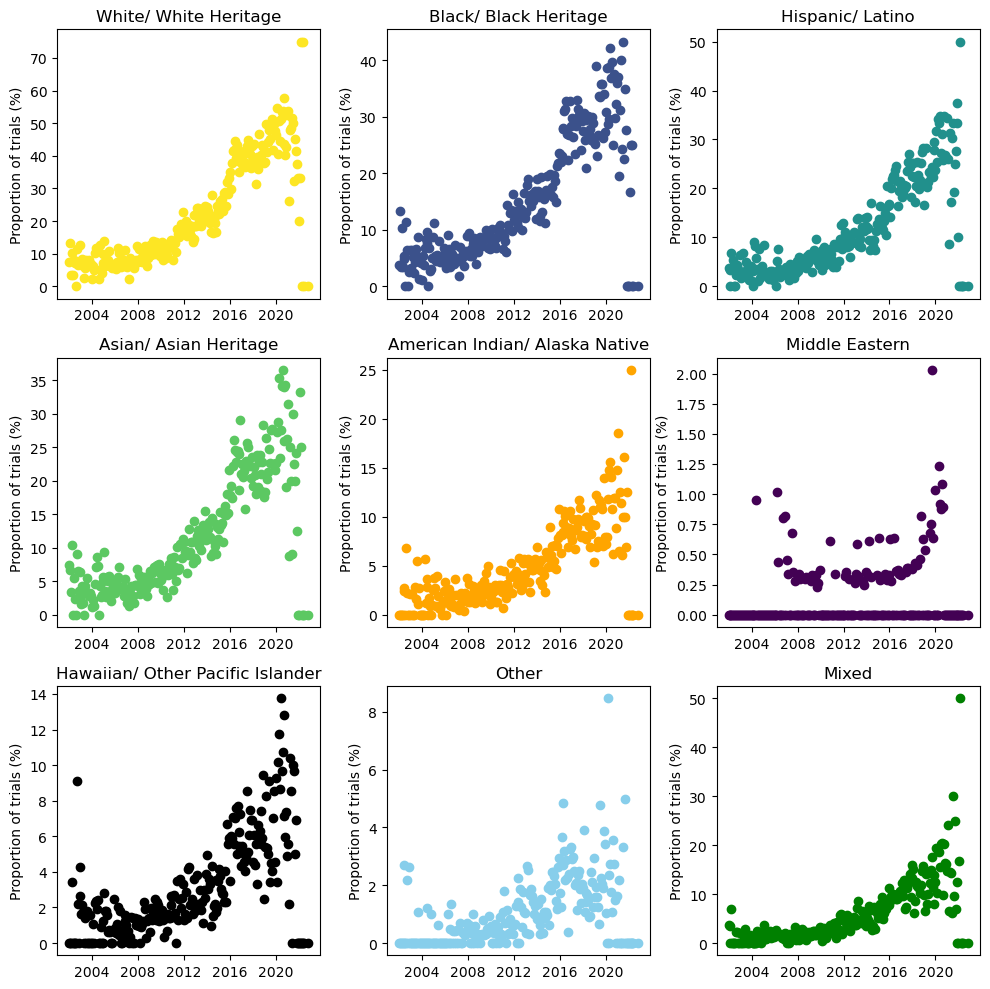

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_columns = ['White/ White Heritage_ratio','Black/ Black Heritage_ratio','Hispanic/ Latino_ratio','Asian/ Asian Heritage_ratio','American Indian/ Alaska Native_ratio','Middle Eastern_ratio','Hawaiian/ Other Pacific Islander_ratio','Other_ratio','Mixed_ratio']
race_names = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

for i, race in enumerate(race_columns):
    ax = axes[i]
    ax.scatter(df_dummies['month_year'], df_dummies[race], color=colors[i], marker='o')
    ax.set_ylabel('Proportion of trials (%)')
    ax.set_title(race_names[i])

plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/world/race_proportion_scatter.png', dpi=300)

plt.show()

## Area chart of trilas with results on ethnicity

In [139]:
trial_results_race_year.head()

year  race_res_dum  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0  2002          1104                           341.0                 1112.0   
1  2003          2260                            35.0                  197.0   
2  2004          3666                            81.0                  541.0   
3  2005          5548                           354.0                 2821.0   
4  2006          9351                           558.0                10194.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                 2866.0                              40.0            3927.0   
1                 4410.0                              43.0             437.0   
2                 2353.0                              28.0            2604.0   
3                 6661.0                             135.0            4058.0   
4                10112.0                             193.0           12155.0   

   Middle Eastern  Mixed   Other  Unknown or Not Reported  \
0             0.0  143.0  2504.0                    818.0   
1             0.0  142.0    12.0                    427.0   
2             4.0  147.0    47.0                    739.0   
3             0.0  585.0     6.0                   4506.0   
4           297.0  922.0   634.0                   3624.0   

   White/ White Heritage  uk_races_dum  race_dum  \
0                34965.0           0.0        62   
1                18138.0           0.0       107   
2                27530.0           0.0       184   
3                85803.0           0.0       278   
4               148456.0           0.0       444   

   number of new trials with results  \
0                                413   
1                                740   
2                               1138   
3                               1735   
4                               2707   

   percent of trials reporting any race/ethnicity data  \
0                                              15.01     
1                                              14.46     
2                                              16.17     
3                                              16.02     
4                                              16.40     

   percent of trials reporting All UK Race Groups  
0                                             0.0  
1                                             0.0  
2                                             0.0  
3                                             0.0  
4                                             0.0

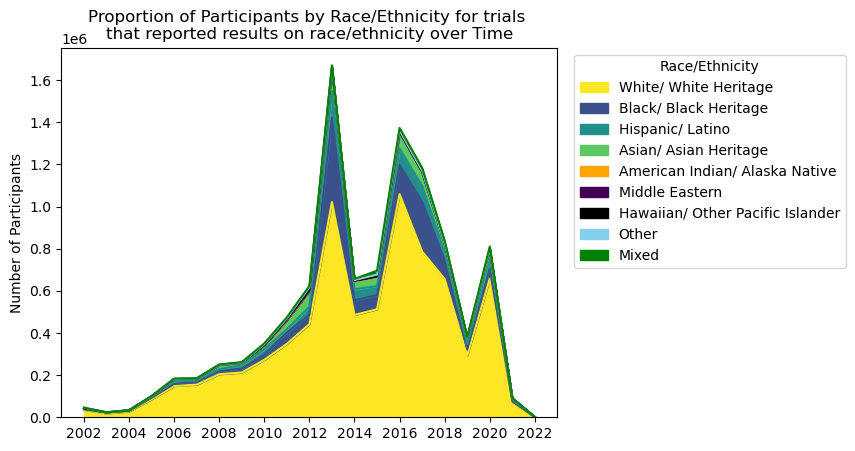

In [140]:
# Selecting the relevant columns for the area chart
columns = ['year', 'White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Creating a new dataframe with the selected columns
race_data = trial_results_race_year[columns]

# Setting the 'year' column as the index
race_data.set_index('year', inplace=True)

# Define the colors for each race/ethnicity
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

# Plotting the area chart with custom colors
race_data.plot.area(stacked=True, color=colors)

# Customizing the plot
plt.title('Proportion of Participants by Race/Ethnicity for trials \nthat reported results on race/ethnicity over Time')
plt.xlabel('')
plt.ylabel('Number of Participants')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.02, 1), loc='upper left')

# Changing x-axis labels
plt.xticks(range(2002, 2023, 2))

# Save the chart as an image file
plt.savefig('/project/world/race_area_chart.png', dpi=300)

# Displaying the chart
plt.show()

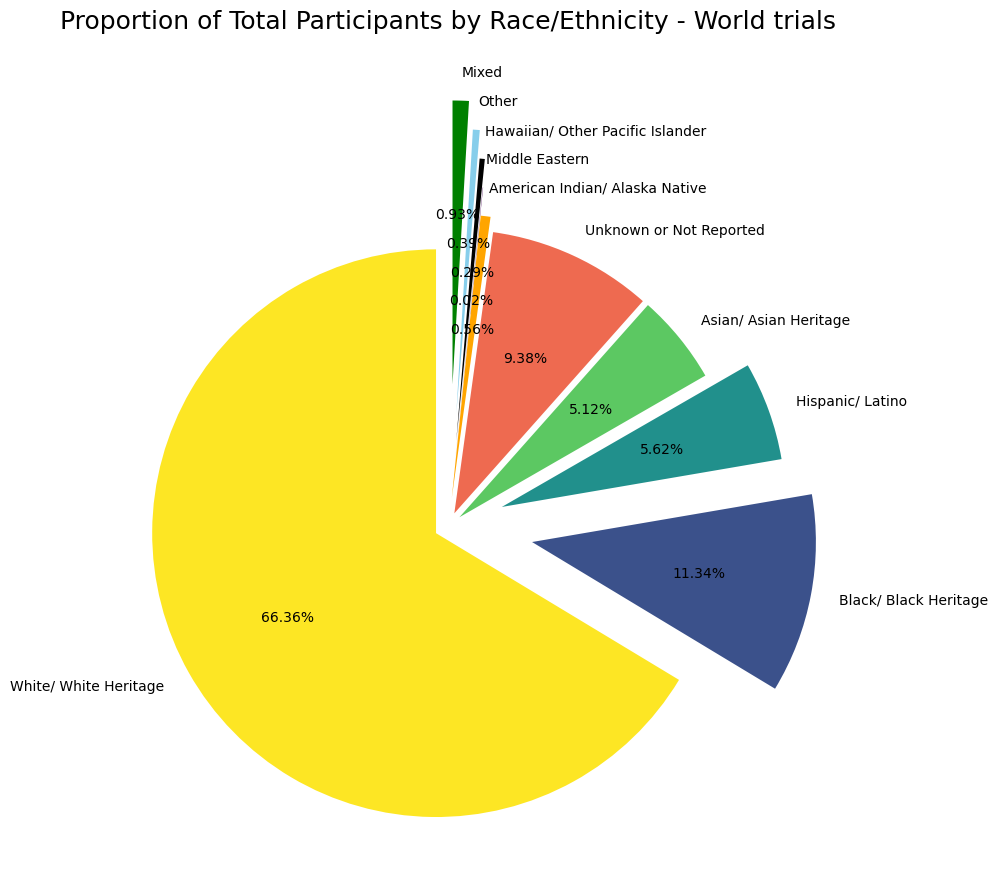

In [141]:
# Calculate the total number of participants by race/ethnicity
total_participants = trial_results_race[['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage','Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']].sum()

# Define the colors for each race/ethnicity
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', '#EE6A50','orange', '#430154', 'black', 'skyblue', 'green']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Set explode values to break the pie chart
explode = (0.05, 0.3, 0.2, 0.05, 0.05, 0.1, 0.2, 0.3, 0.4,0.5)

# Plot the pie chart
ax.pie(total_participants, labels=total_participants.index, autopct='%1.2f%%', startangle=90, colors=colors, textprops={'color': 'black'}, explode=explode)

# Set the title
ax.set_title('Proportion of Total Participants by Race/Ethnicity - World trials', y=1.19, fontsize=18)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

# Adjust padding around the figure
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/world/participants_pie_chart.png', dpi=300)

# Display the plot
plt.show()


In [143]:
# Calculate the total number of participants by race/ethnicity
total_participants = trial_results_race[['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']].sum()

# Define the colors for each race/ethnicity
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', '#EE6A50', 'orange', '#430154', 'black', 'skyblue', 'green']

# Create a Pie chart figure
fig = go.Figure(data=[go.Pie(
    labels=total_participants.index,
    values=total_participants,
    textinfo='label+percent',
    hovertemplate='%{label}<br>%{value}<br>%{percent:.1%}',
    marker=dict(colors=colors),
)])

# Set the title
fig.update_layout(
    title='Proportion of Total Participants by Race/Ethnicity',
    title_font_size=18,
)

# Show the interactive chart
fig.show()

## Connected Dot graph

In [144]:
trial_results_race_year.head()

year  race_res_dum  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0  2002          1104                           341.0                 1112.0   
1  2003          2260                            35.0                  197.0   
2  2004          3666                            81.0                  541.0   
3  2005          5548                           354.0                 2821.0   
4  2006          9351                           558.0                10194.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                 2866.0                              40.0            3927.0   
1                 4410.0                              43.0             437.0   
2                 2353.0                              28.0            2604.0   
3                 6661.0                             135.0            4058.0   
4                10112.0                             193.0           12155.0   

   Middle Eastern  Mixed   Other  Unknown or Not Reported  \
0             0.0  143.0  2504.0                    818.0   
1             0.0  142.0    12.0                    427.0   
2             4.0  147.0    47.0                    739.0   
3             0.0  585.0     6.0                   4506.0   
4           297.0  922.0   634.0                   3624.0   

   White/ White Heritage  uk_races_dum  race_dum  \
0                34965.0           0.0        62   
1                18138.0           0.0       107   
2                27530.0           0.0       184   
3                85803.0           0.0       278   
4               148456.0           0.0       444   

   number of new trials with results  \
0                                413   
1                                740   
2                               1138   
3                               1735   
4                               2707   

   percent of trials reporting any race/ethnicity data  \
0                                              15.01     
1                                              14.46     
2                                              16.17     
3                                              16.02     
4                                              16.40     

   percent of trials reporting All UK Race Groups  
0                                             0.0  
1                                             0.0  
2                                             0.0  
3                                             0.0  
4                                             0.0

In [145]:
# Selecting the years 2017-2021 (2022 has 0)
# Filtering the dataframe for the years 2017-2021
selected_years = trial_results_race_year.loc[(trial_results_race_year['year'] >= 2017) & (trial_results_race_year['year'] <= 2021)]

In [146]:
# Specify the columns to sum
columns_to_sum = ['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']

# Create a new column for total participants per year
selected_years['Total Participants'] = selected_years[columns_to_sum].sum(axis=1)

/tmp/ipykernel_138/3583478520.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
selected_years

year  race_res_dum  American Indian/ Alaska Native  Asian/ Asian Heritage  \
15  2017         65071                          5731.0                60367.0   
16  2018         53744                          5903.0                32631.0   
17  2019         35395                          1976.0                26173.0   
18  2020         23223                         13033.0                24036.0   
19  2021          6922                           905.0                 4867.0   

    Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
15               237546.0                            1852.0           74408.0   
16                88793.0                            2261.0           37920.0   
17                30413.0                             523.0           24615.0   
18                46209.0                             844.0           56442.0   
19                 5019.0                             114.0            8819.0   

    Middle Eastern    Mixed   Other  Unknown or Not Reported  \
15            26.0  12787.0  3803.0                  96970.0   
16            99.0  12166.0   771.0                  33608.0   
17            25.0   3603.0   475.0                  10676.0   
18           732.0   9187.0  2437.0                  84643.0   
19             0.0   1097.0   207.0                  66732.0   

    White/ White Heritage  uk_races_dum  race_dum  \
15               786887.0          19.0      2558   
16               656329.0          18.0      2071   
17               292592.0          10.0      1480   
18               657504.0           3.0       859   
19                70503.0           2.0       292   

    number of new trials with results  \
15                               3388   
16                               2733   
17                               1897   
18                               1082   
19                                398   

    percent of trials reporting any race/ethnicity data  \
15                                              75.50     
16                                              75.78     
17                                              78.02     
18                                              79.39     
19                                              73.37     

    percent of trials reporting All UK Race Groups  Total Participants  
15                                            0.74           1280377.0  
16                                            0.87            870481.0  
17                                            0.68            391071.0  
18                                            0.35            895067.0  
19                                            0.68            158263.0

In [148]:
# Calculate the mean of each column
mean_values = selected_years.mean()

In [149]:
# Create a new dataframe for mean values
mean_df = pd.DataFrame(mean_values, columns=['Mean'])
mean_df

Mean
year                                                  2019.000
race_res_dum                                         36871.000
American Indian/ Alaska Native                        5509.600
Asian/ Asian Heritage                                29614.800
Black/ Black Heritage                                81596.000
Hawaiian/ Other Pacific Islander                      1118.800
Hispanic/ Latino                                     40440.800
Middle Eastern                                         176.400
Mixed                                                 7768.000
Other                                                 1538.600
Unknown or Not Reported                              58525.800
White/ White Heritage                               492763.000
uk_races_dum                                            10.400
race_dum                                              1452.000
number of new trials with results                     1899.600
percent of trials reporting any race/ethnicity ...      76.412
percent of trials reporting All UK Race Groups           0.664
Total Participants                                  719051.800

In [150]:
# Selecting the desired columns
columns_to_select = ['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed','Total Participants']
selected_rows = mean_df.loc[columns_to_select]

In [151]:
# Calculate the percentage of each category
selected_rows['% of trial'] = round((selected_rows['Mean'] / selected_rows.loc['Total Participants', 'Mean']) * 100,2)

In [152]:
selected_rows

Mean  % of trial
White/ White Heritage             492763.0       68.53
Black/ Black Heritage              81596.0       11.35
Hispanic/ Latino                   40440.8        5.62
Asian/ Asian Heritage              29614.8        4.12
Unknown or Not Reported            58525.8        8.14
American Indian/ Alaska Native      5509.6        0.77
Middle Eastern                       176.4        0.02
Hawaiian/ Other Pacific Islander    1118.8        0.16
Other                               1538.6        0.21
Mixed                               7768.0        1.08
Total Participants                719051.8      100.00

In [153]:
selected_rows_2 = selected_rows.copy()

In the UK 2021 Census only the following race/ethnicities have been used
- White
- Black
- Asian
- Mixed
- Other
    - The "Other" category includes "Arab" and "Other ethnic groups". Therefore, i will subtract the Arab group from other and match it with the Middle Easter group i have. I will sum up American Indian/ Alaska Native, Hispanic/ Latino, Hawaiian/ Other Pacific Islander and Other together to form the Other group.

This can be achieved because i found a broken down list of all the subgroups of race/ethnicities used in the 2021 Census.

In [154]:
# Rows to be summed up
rows_to_sum = ['Hispanic/ Latino', 'American Indian/ Alaska Native', 'Hawaiian/ Other Pacific Islander', 'Other']

# Calculate the sum of the selected rows
other_sum = selected_rows.loc[rows_to_sum].sum()

# Create the 'Other' row
other_row = pd.DataFrame(other_sum).transpose()

# Append the 'Other' row to the DataFrame
selected_rows = selected_rows.append(other_row)

# Drop the rows that were summed up
selected_rows = selected_rows.drop(rows_to_sum)

other_row.index = ['Other']

/tmp/ipykernel_138/3462180342.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [155]:
# Rename the row with index 0 to 'Other'
selected_rows = selected_rows.rename(index={0: 'Other'})
selected_rows

Mean  % of trial
White/ White Heritage    492763.0       68.53
Black/ Black Heritage     81596.0       11.35
Asian/ Asian Heritage     29614.8        4.12
Unknown or Not Reported   58525.8        8.14
Middle Eastern              176.4        0.02
Mixed                      7768.0        1.08
Total Participants       719051.8      100.00
Other                     48607.8        6.76

In [156]:
# Define a list of the desired rows to keep
desired_rows = ['White/ White Heritage', 'Black/ Black Heritage', 'Asian/ Asian Heritage', 'Other', 'Mixed', 'Middle Eastern']

# Filter the dataframe based on the desired rows
filtered_rows = selected_rows[selected_rows.index.isin(desired_rows)]
filtered_rows

Mean  % of trial
White/ White Heritage  492763.0       68.53
Black/ Black Heritage   81596.0       11.35
Asian/ Asian Heritage   29614.8        4.12
Middle Eastern            176.4        0.02
Mixed                    7768.0        1.08
Other                   48607.8        6.76

In [157]:
# Create a new column "UK Census" with the specified values from CENSUS 2021 RESULTS.
filtered_rows['UK Census'] = [81.7, 4, 9.3, 0.6, 2.9, 1.5]

/tmp/ipykernel_138/1679602621.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
filtered_rows

Mean  % of trial  UK Census
White/ White Heritage  492763.0       68.53       81.7
Black/ Black Heritage   81596.0       11.35        4.0
Asian/ Asian Heritage   29614.8        4.12        9.3
Middle Eastern            176.4        0.02        0.6
Mixed                    7768.0        1.08        2.9
Other                   48607.8        6.76        1.5

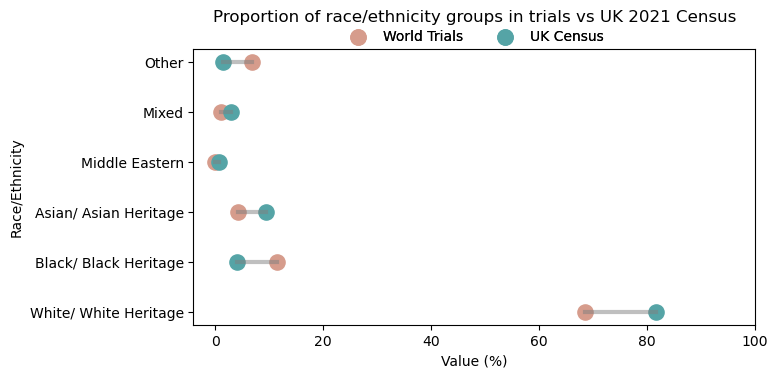

In [160]:
# Reverse the order of rows to match the desired y-axis order
filtered_rows = filtered_rows.iloc[::-1]

# Extract the race/ethnicity categories
categories = filtered_rows.index

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the "% of trials" and "UK Census" values for each category with larger dots
ax.scatter(filtered_rows['% of trial'], categories, color='#d69c8c', label='% of trials', s=120)
ax.scatter(filtered_rows['UK Census'], categories, color='#55a4a6', label='UK Census', s=120)

# Connect the dots with a faded grey line for each category
for category in categories:
    ax.plot([filtered_rows.loc[category, '% of trial'], filtered_rows.loc[category, 'UK Census']],
            [category, category], color='grey', alpha=0.5, linewidth=3)

# Set the y-axis ticks and labels
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)

# Set the x-axis ticks and labels
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(range(0, 101, 20))

# Set the axis labels and title
ax.set_xlabel('Value (%)')
ax.set_ylabel('Race/Ethnicity')
ax.set_title('Proportion of race/ethnicity groups in trials vs UK 2021 Census', pad=20)

# Move the legend between the title and the plot
legend = ax.legend(['World Trials', 'UK Census'], loc='upper center', bbox_to_anchor=(0.5, 1.117), ncol=2, frameon=False)
ax.add_artist(legend)

# Adjust the layout and margins
plt.tight_layout(pad=1.5)

# Save the chart as an image file
# plt.savefig('/project/world/trialsVScensus.png', dpi=300)

# Display the plot
plt.show()

## Race/ethnicities that were reported among trials that included any race/ethnicity enrollment results data and the proportion fo those trials that reported each individual race/ethnicity.

In [161]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 82 to 206
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   month_year                              247 non-null    datetime64[ns]
 1   race_res_dum                            247 non-null    int64         
 2   American Indian/ Alaska Native          247 non-null    int64         
 3   Asian/ Asian Heritage                   247 non-null    int64         
 4   Black/ Black Heritage                   247 non-null    int64         
 5   Hawaiian/ Other Pacific Islander        247 non-null    int64         
 6   Hispanic/ Latino                        247 non-null    int64         
 7   Middle Eastern                          247 non-null    int64         
 8   Mixed                                   247 non-null    int64         
 9   Other                                   247 non-null 

In [162]:
df_dummies_2 = df_dummies.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [163]:
df_dummies_2 = df_dummies_2[df_dummies_2['race_dum']>0]

In [164]:
df_sum = df_dummies_2.sum()

/tmp/ipykernel_138/2080977414.py:1: FutureWarning:

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [165]:
df_sum = df_sum.to_frame()

In [166]:
df_sum.reset_index(inplace=True)

In [167]:
# Rename columns using a dictionary
new_columns = {'index': 'Race/Ethnicity', df_sum.columns[-1]: 'Count'}
df_sum = df_sum.rename(columns=new_columns)

In [168]:
df_sum['Proportion of trials'] = round((df_sum['Count']/22084.0)*100,2)

In [169]:
df_sum

Race/Ethnicity     Count  Proportion of trials
0                       race_res_dum  546680.0               2475.46
1     American Indian/ Alaska Native    2549.0                 11.54
2              Asian/ Asian Heritage    6181.0                 27.99
3              Black/ Black Heritage    8080.0                 36.59
4   Hawaiian/ Other Pacific Islander    1610.0                  7.29
5                   Hispanic/ Latino    6025.0                 27.28
6                     Middle Eastern      81.0                  0.37
7                              Mixed    2875.0                 13.02
8                              Other     591.0                  2.68
9            Unknown or Not Reported    5411.0                 24.50
10             White/ White Heritage   11359.0                 51.44
11                      uk_races_dum     138.0                  0.62
12                          race_dum   22084.0                100.00

In [170]:
df_sum = df_sum.iloc[[1,2,3,4,5,6,7,8,9,10,11]]

In [171]:
df_sum

Race/Ethnicity    Count  Proportion of trials
1     American Indian/ Alaska Native   2549.0                 11.54
2              Asian/ Asian Heritage   6181.0                 27.99
3              Black/ Black Heritage   8080.0                 36.59
4   Hawaiian/ Other Pacific Islander   1610.0                  7.29
5                   Hispanic/ Latino   6025.0                 27.28
6                     Middle Eastern     81.0                  0.37
7                              Mixed   2875.0                 13.02
8                              Other    591.0                  2.68
9            Unknown or Not Reported   5411.0                 24.50
10             White/ White Heritage  11359.0                 51.44
11                      uk_races_dum    138.0                  0.62

In [172]:
# Rename 'uk_races_dum' to 'Other'
df_sum['Race/Ethnicity'] = df_sum['Race/Ethnicity'].replace('uk_races_dum', 'All UK Race Groups')

/tmp/ipykernel_138/1167518604.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



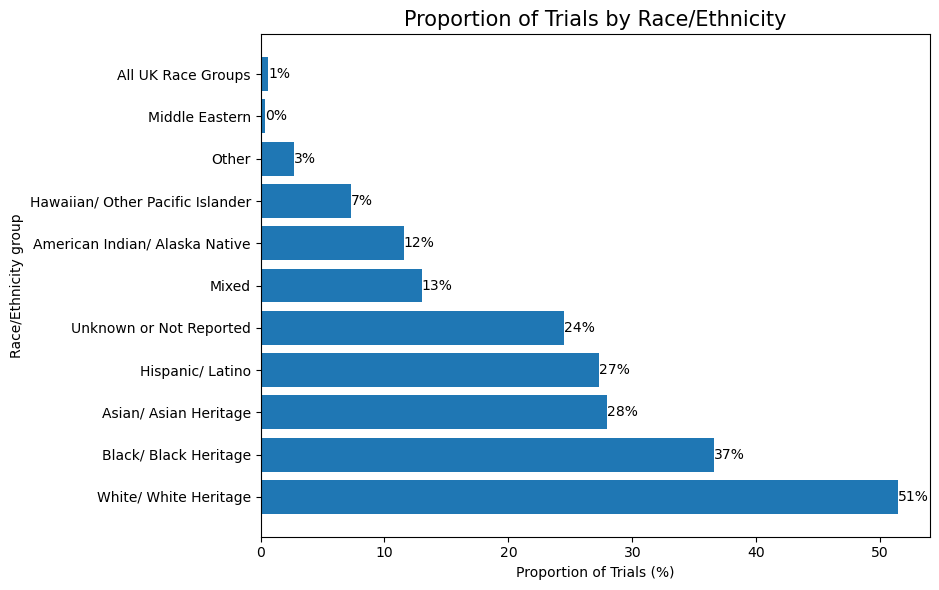

In [173]:
# Sort the DataFrame excluding the "uk_races_dum" row and append it at the end
df_sorted = df_sum[df_sum['Race/Ethnicity'] != 'All UK Race Groups'].sort_values('Proportion of trials', ascending=False)
df_sorted = pd.concat([df_sorted, df_sum[df_sum['Race/Ethnicity'] == 'All UK Race Groups']])

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_sorted['Race/Ethnicity'], df_sorted['Proportion of trials'])

# Add value labels on the right side of the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}%', ha='left', va='center')

# Set the labels and title
ax.set_xlabel('Proportion of Trials (%)')
ax.set_ylabel('Race/Ethnicity group')
ax.set_title('Proportion of Trials by Race/Ethnicity', fontsize=15)

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/world/bar_chart_all.png', dpi=300)

# Display the plot
plt.show()

## Distribution of trials according to race/ethnicity of enrollees

In [174]:
dist_df = trial_results_race[trial_results_race['uk_races_dum']==1]

In [175]:
dist_df

nct_id start_date_x  race_res_dum  year_x start_date_y  \
7147   NCT00543309   2007-10-31            24    2007   2007-10-31   
8347   NCT00602667   2007-12-17            68    2007   2007-12-17   
10315  NCT00706121   2008-06-30            35    2008   2008-06-30   
11775  NCT00780026   2008-07-31            33    2008   2008-07-31   
13140  NCT00846742   2009-06-05             7    2009   2009-05-06   
...            ...          ...           ...     ...          ...   
52575  NCT04203823   2020-07-20            24    2020   2020-07-20   
53415  NCT04504032   2020-09-02            33    2020   2020-02-09   
53469  NCT04529499   2020-08-22            42    2020   2020-08-22   
53608  NCT04583280   2021-09-06            36    2021   2021-06-09   
53868  NCT04753034   2021-01-18            24    2021   2021-01-18   

       American Indian/ Alaska Native  Asian/ Asian Heritage  \
7147                              0.0                    0.0   
8347                              2.0                   20.0   
10315                            36.0                  108.0   
11775                             0.0                    0.0   
13140                             0.0                    3.0   
...                               ...                    ...   
52575                             0.0                    2.0   
53415                             0.0                    0.0   
53469                             0.0                  256.0   
53608                             0.0                    0.0   
53868                             0.0                   14.0   

       Black/ Black Heritage  Hawaiian/ Other Pacific Islander  \
7147                     0.0                               0.0   
8347                    60.0                               2.0   
10315                 1390.0                               0.0   
11775                    0.0                               0.0   
13140                    8.0                               0.0   
...                      ...                               ...   
52575                    6.0                               0.0   
53415                    0.0                               0.0   
53469                    2.0                               0.0   
53608                    0.0                               0.0   
53868                   34.0                               0.0   

       Hispanic/ Latino  Middle Eastern  Mixed  Other  \
7147                0.0             0.0    0.0    0.0   
8347               86.0             0.0   30.0   14.0   
10315             234.0             0.0    8.0   32.0   
11775               0.0             0.0    0.0    0.0   
13140               0.0             0.0    5.0    3.0   
...                 ...             ...    ...    ...   
52575              26.0             0.0    2.0    4.0   
53415               0.0             0.0    0.0    0.0   
53469               0.0           526.0    0.0   72.0   
53608               0.0             0.0    0.0    0.0   
53868               8.0             0.0    4.0    2.0   

       Unknown or Not Reported  White/ White Heritage  uk_races_dum  race_dum  \
7147                       0.0                    0.0           1.0         1   
8347                      44.0                  902.0           1.0         1   
10315                      0.0                11284.0           1.0         1   
11775                      0.0                    0.0           1.0         1   
13140                      0.0                   66.0           1.0         1   
...                        ...                    ...           ...       ...   
52575                      2.0                  462.0           1.0         1   
53415                      0.0                    0.0           1.0         1   
53469                      2.0                  554.0           1.0         1   
53608                      0.0                    0.0           1.0         1   
53868                      6.0   

In [176]:
dist_df = dist_df.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16]]

In [177]:
dist_df['total participants'] = dist_df.sum(axis=1)

/tmp/ipykernel_138/332937179.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
# Calculate the proportion of enrollees for each ethnicity
ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Calculate the proportion of enrollees for each race/ethnicity
for ethnicity in ethnicities:
    dist_df[ethnicity + '_Proportion'] = round(dist_df[ethnicity] / dist_df['total participants'] * 100,2)

/tmp/ipykernel_138/2665245422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_138/2665245422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_138/2665245422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_138/266

In [179]:
dist_df

American Indian/ Alaska Native  Asian/ Asian Heritage  \
7147                              0.0                    0.0   
8347                              2.0                   20.0   
10315                            36.0                  108.0   
11775                             0.0                    0.0   
13140                             0.0                    3.0   
...                               ...                    ...   
52575                             0.0                    2.0   
53415                             0.0                    0.0   
53469                             0.0                  256.0   
53608                             0.0                    0.0   
53868                             0.0                   14.0   

       Black/ Black Heritage  Hawaiian/ Other Pacific Islander  \
7147                     0.0                               0.0   
8347                    60.0                               2.0   
10315                 1390.0                               0.0   
11775                    0.0                               0.0   
13140                    8.0                               0.0   
...                      ...                               ...   
52575                    6.0                               0.0   
53415                    0.0                               0.0   
53469                    2.0                               0.0   
53608                    0.0                               0.0   
53868                   34.0                               0.0   

       Hispanic/ Latino  Middle Eastern  Mixed  Other  \
7147                0.0             0.0    0.0    0.0   
8347               86.0             0.0   30.0   14.0   
10315             234.0             0.0    8.0   32.0   
11775               0.0             0.0    0.0    0.0   
13140               0.0             0.0    5.0    3.0   
...                 ...             ...    ...    ...   
52575              26.0             0.0    2.0    4.0   
53415               0.0             0.0    0.0    0.0   
53469               0.0           526.0    0.0   72.0   
53608               0.0             0.0    0.0    0.0   
53868               8.0             0.0    4.0    2.0   

       Unknown or Not Reported  White/ White Heritage  ...  \
7147                       0.0                    0.0  ...   
8347                      44.0                  902.0  ...   
10315                      0.0                11284.0  ...   
11775                      0.0                    0.0  ...   
13140                      0.0                   66.0  ...   
...                        ...                    ...  ...   
52575                      2.0                  462.0  ...   
53415                      0.0                    0.0  ...   
53469                      2.0                  554.0  ...   
53608                      0.0                    0.0  ...   
53868                      6.0                  184.0  ...   

       total participants  White/ White Heritage_Proportion  \
7147                  2.0                              0.00   
8347               1162.0                             77.62   
10315             13094.0                             86.18   
11775                 2.0                              0.00   
13140                87.0                             75.86   
...                   ...                               ...   
52575               506.0                             91.30   
53415                 2.0                              0.00   
53469              1414.0                             39.18   
53608                 2.0                              0.00   
53868               254.0                             72.44   

       Black/ Black Heritage_Proportion  Hispanic/ Latino_Proportion  \
7147                               0.00                         0.00   
8347                               5.16                         7.40   
10315                             10.62   

In [180]:
dist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 7147 to 53868
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   American Indian/ Alaska Native               138 non-null    float64
 1   Asian/ Asian Heritage                        138 non-null    float64
 2   Black/ Black Heritage                        138 non-null    float64
 3   Hawaiian/ Other Pacific Islander             138 non-null    float64
 4   Hispanic/ Latino                             138 non-null    float64
 5   Middle Eastern                               138 non-null    float64
 6   Mixed                                        138 non-null    float64
 7   Other                                        138 non-null    float64
 8   Unknown or Not Reported                      138 non-null    float64
 9   White/ White Heritage                        138 non-null    float64
 1

In [181]:
dist_df_2 = dist_df.iloc[:,[12,13,14,15,16,17,18,19,20,21]]

In [182]:
dist_df_2.head()

total participants  White/ White Heritage_Proportion  \
7147                  2.0                              0.00   
8347               1162.0                             77.62   
10315             13094.0                             86.18   
11775                 2.0                              0.00   
13140                87.0                             75.86   

       Black/ Black Heritage_Proportion  Hispanic/ Latino_Proportion  \
7147                               0.00                         0.00   
8347                               5.16                         7.40   
10315                             10.62                         1.79   
11775                              0.00                         0.00   
13140                              9.20                         0.00   

       Asian/ Asian Heritage_Proportion  \
7147                               0.00   
8347                               1.72   
10315                              0.82   
11775                              0.00   
13140                              3.45   

       American Indian/ Alaska Native_Proportion  Middle Eastern_Proportion  \
7147                                        0.00                        0.0   
8347                                        0.17                        0.0   
10315                                       0.27                        0.0   
11775                                       0.00                        0.0   
13140                                       0.00                        0.0   

       Hawaiian/ Other Pacific Islander_Proportion  Other_Proportion  \
7147                                          0.00              0.00   
8347                                          0.17              1.20   
10315                                         0.00              0.24   
11775                                         0.00              0.00   
13140                                         0.00              3.45   

       Mixed_Proportion  
7147               0.00  
8347               2.58  
10315              0.06  
11775              0.00  
13140              5.75

In [183]:
dist_df_2.to_csv('/project/world/dist_df_2.csv')

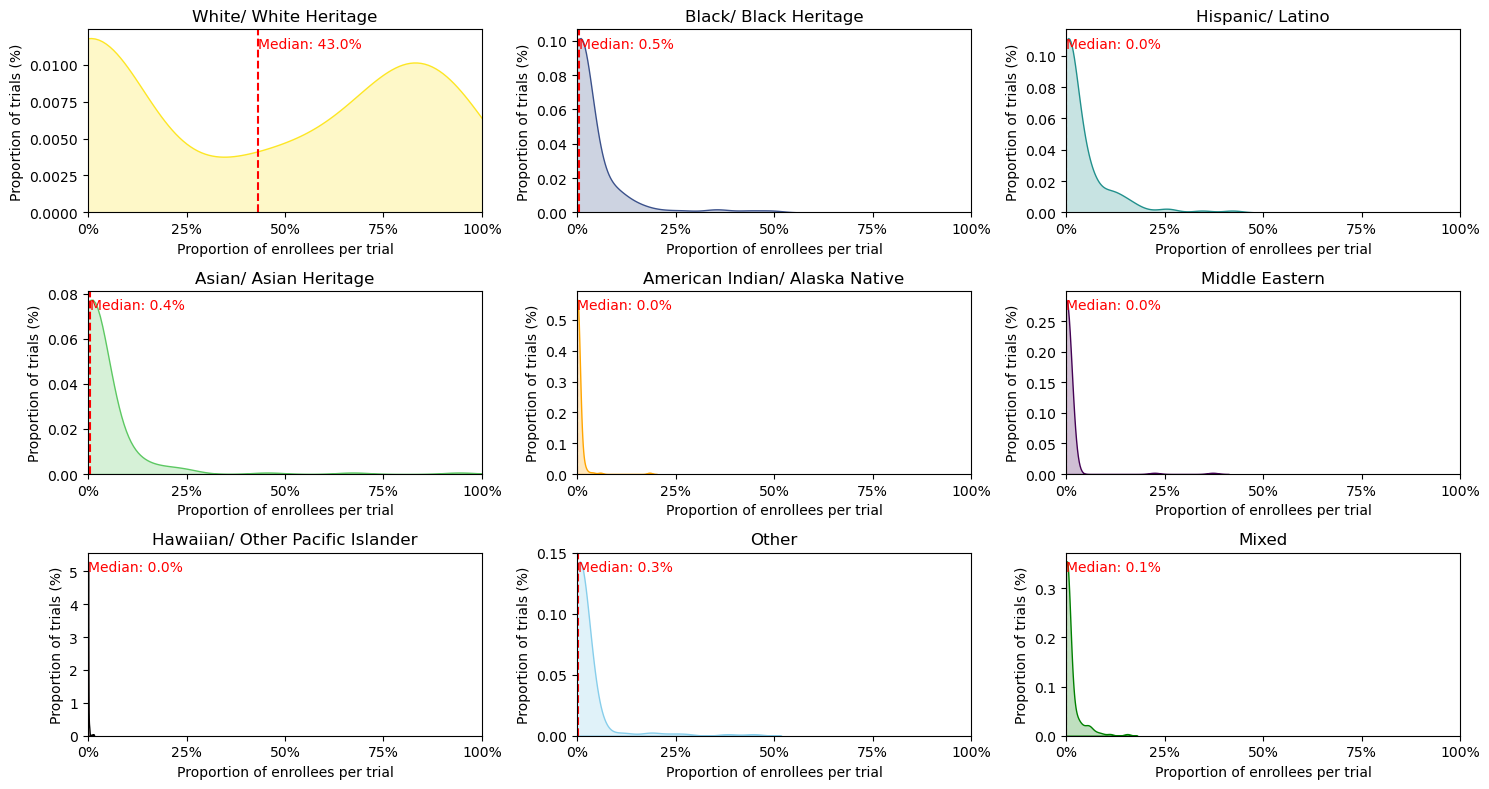

In [184]:
# Define the desired order of columns
columns_to_plot = ['White/ White Heritage_Proportion','Black/ Black Heritage_Proportion','Hispanic/ Latino_Proportion','Asian/ Asian Heritage_Proportion','American Indian/ Alaska Native_Proportion','Middle Eastern_Proportion','Hawaiian/ Other Pacific Islander_Proportion','Other_Proportion','Mixed_Proportion']

# Set the number of columns and rows for subplots
num_columns = 3
num_rows = 3

# Define colors for each graph
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and plot the line histogram
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(data=dist_df_2[column], ax=axes[i], fill=True, color=colors[i % len(colors)])
    axes[i].set_xlim(0, 100)  # Set x-axis limits to 0-100%
    axes[i].set_ylim(0, None)  # Set y-axis to automatically adjust
    axes[i].set_xlabel('Proportion of enrollees per trial')
    axes[i].set_ylabel('Proportion of trials (%)')
    axes[i].set_title(column.split('_')[0])  # Change the title to each graph

    # Calculate and plot the median line
    median_value = dist_df_2[column].median()
    axes[i].axvline(median_value, color='red', linestyle='--')
    
    # Add text annotation for the median value
    axes[i].text(median_value, axes[i].get_ylim()[1]*0.9, f"Median: {median_value:.1f}%", color='red', ha='left')

    # Set custom x-axis tick positions and labels
    axes[i].set_xticks([0, 25, 50, 75, 100])
    axes[i].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# Adjust the spacing between subplots
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/world/race_distributions.png', dpi=300)

# Show the plot
plt.show()


## Average number of participants per trial

In [185]:
average_participants = df_race_trials.copy()

In [186]:
df_race_trials

nct_id start_date  American Indian/ Alaska Native  \
0      NCT00025259 2002-09-30                             8.0   
1      NCT00027846 2003-08-31                             0.0   
2      NCT00030147 2002-02-28                             0.0   
3      NCT00030992 2002-02-28                             0.0   
4      NCT00033293 2004-03-15                             0.0   
...            ...        ...                             ...   
22079  NCT05604794 2020-03-13                             0.0   
22080  NCT05607147 2021-01-26                             0.0   
22081  NCT05736861 2021-08-06                             0.0   
22082  NCT05736874 2021-06-08                             0.0   
22083  NCT05751629 2018-11-15                             0.0   

       Asian/ Asian Heritage  Black/ Black Heritage  \
0                      100.0                  388.0   
1                        0.0                    0.0   
2                        4.0                   24.0   
3                        0.0                    0.0   
4                        0.0                    0.0   
...                      ...                    ...   
22079                    0.0                    0.0   
22080                    3.0                    3.0   
22081                    0.0                    0.0   
22082                    0.0                    0.0   
22083                    1.0                    2.0   

       Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  \
0                                  12.0             518.0             0.0   
1                                   0.0               0.0             0.0   
2                                   0.0              12.0             0.0   
3                                   0.0               0.0             0.0   
4                                   0.0               0.0             0.0   
...                                 ...               ...             ...   
22079                               0.0               0.0             0.0   
22080                               0.0               0.0             0.0   
22081                               0.0             326.0             0.0   
22082                               0.0               0.0             0.0   
22083                               0.0               5.0             0.0   

       Mixed  Other  Unknown or Not Reported  White/ White Heritage  \
0        0.0    0.0                    364.0                 5546.0   
1        0.0    0.0                      0.0                    0.0   
2        0.0    0.0                     14.0                  198.0   
3        0.0    0.0                      0.0                    0.0   
4        0.0    0.0                      0.0                    0.0   
...      ...    ...                      ...                    ...   
22079    0.0  441.0                     56.0                 1309.0   
22080    0.0    0.0                      0.0                    4.0   
22081    0.0    0.0                      0.0                 2856.0   
22082    0.0    0.0                      0.0                    0.0   
22083    0.0    0.0                      6.0                   68.0   

       uk_races_dum  count  year  
0                 0      1  2002  
1                 0      1  2003  
2                 0      1  2002  
3                 0      1  2002  
4                 0      1  2004  
...             ...    ...   ...  
22079             0      1  2020  
22080             0      1  2021  
22081             0      1  2021  
22082             0      1  2021  
22083             0      1  2018  

[22084 rows x 15 columns]

In [187]:
average_participants['average_participants'] = average_participants[['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed','Unknown or Not Reported']].sum(axis=1)

In [188]:
average_participants.head()

nct_id start_date  American Indian/ Alaska Native  \
0  NCT00025259 2002-09-30                             8.0   
1  NCT00027846 2003-08-31                             0.0   
2  NCT00030147 2002-02-28                             0.0   
3  NCT00030992 2002-02-28                             0.0   
4  NCT00033293 2004-03-15                             0.0   

   Asian/ Asian Heritage  Black/ Black Heritage  \
0                  100.0                  388.0   
1                    0.0                    0.0   
2                    4.0                   24.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

   Hawaiian/ Other Pacific Islander  Hispanic/ Latino  Middle Eastern  Mixed  \
0                              12.0             518.0             0.0    0.0   
1                               0.0               0.0             0.0    0.0   
2                               0.0              12.0             0.0    0.0   
3                               0.0               0.0             0.0    0.0   
4                               0.0               0.0             0.0    0.0   

   Other  Unknown or Not Reported  White/ White Heritage  uk_races_dum  count  \
0    0.0                    364.0                 5546.0             0      1   
1    0.0                      0.0                    0.0             0      1   
2    0.0                     14.0                  198.0             0      1   
3    0.0                      0.0                    0.0             0      1   
4    0.0                      0.0                    0.0             0      1   

   year  average_participants  
0  2002                6936.0  
1  2003                   0.0  
2  2002                 252.0  
3  2002                   0.0  
4  2004                   0.0

In [189]:
print('There are ' + str(int(average_participants.average_participants.mean())) + ' participants per trial.')

There are 511 participants per trial.


In [190]:
avg_part_year = average_participants.groupby(['year']).sum()

/tmp/ipykernel_138/4199202262.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [191]:
avg_part_year.reset_index(inplace=True)

In [192]:
avg_part_year

year  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0   2002                           341.0                 1112.0   
1   2003                            35.0                  197.0   
2   2004                            81.0                  541.0   
3   2005                           354.0                 2821.0   
4   2006                           558.0                10194.0   
5   2007                           408.0                 8691.0   
6   2008                          1369.0                18172.0   
7   2009                           956.0                11299.0   
8   2010                          2431.0                16806.0   
9   2011                          3459.0                40511.0   
10  2012                          3549.0                71505.0   
11  2013                          6627.0               101274.0   
12  2014                          4997.0                34335.0   
13  2015                          4607.0                40320.0   
14  2016                          5406.0                72413.0   
15  2017                          5731.0                60367.0   
16  2018                          5903.0                32631.0   
17  2019                          1976.0                26173.0   
18  2020                         13033.0                24036.0   
19  2021                           905.0                 4867.0   
20  2022                             2.0                   58.0   

    Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                  2866.0                              40.0            3927.0   
1                  4410.0                              43.0             437.0   
2                  2353.0                              28.0            2604.0   
3                  6661.0                             135.0            4058.0   
4                 10112.0                             193.0           12155.0   
5                 12250.0                             225.0            6890.0   
6                 15919.0                             463.0            8493.0   
7                 18020.0                             434.0           16067.0   
8                 25283.0                             346.0           24620.0   
9                 53402.0                            5158.0           16160.0   
10                44598.0                            9126.0           37961.0   
11               400594.0                            4132.0          126960.0   
12                69859.0                            1458.0           52099.0   
13                66979.0                            1100.0           43022.0   
14               139597.0                            4704.0           76845.0   
15               237546.0                            1852.0           74408.0   
16                88793.0                            2261.0           37920.0   
17                30413.0                             523.0           24615.0   
18                46209.0                             844.0           56442.0   
19                 5019.0                             114.0            8819.0   
20                   55.0                               0.0             146.0   

    Middle Eastern    Mixed   Other  Unknown or Not Reported  \
0              0.0    143.0  2504.0                    818.0   
1              0.0    142.0    12.0                    427.0   
2              4.0    147.0    47.0                    739.0   
3              0.0    585.0     6.0                   4506.0   
4            297.0    922.0   634.0                   3624.0   
5            172.0    885.0   184.0                   3397.0   
6             12.0   1697.0   303.0                   5285.0   
7             46.0   2006.0   378.0                   9052.0   
8             24.0   4461.0  4163.0                  14961.0   
9              2.0   5165.0  2321.0                  82947.0   
10            50.0   7165.0  7881.0       

In [193]:
avg_part_year = avg_part_year.iloc[:,[0,12,13]]

In [194]:
avg_part_year['average participants per trial'] = round(avg_part_year['average_participants']/avg_part_year['count'],0)

/tmp/ipykernel_138/1682114084.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [195]:
avg_part_year

year  count  average_participants  average participants per trial
0   2002     62               46716.0                           753.0
1   2003    107               23841.0                           223.0
2   2004    184               34074.0                           185.0
3   2005    278              104929.0                           377.0
4   2006    444              187145.0                           421.0
5   2007    523              187956.0                           359.0
6   2008    652              256160.0                           393.0
7   2009    859              270759.0                           315.0
8   2010    946              365844.0                           387.0
9   2011   1119              557849.0                           499.0
10  2012   1244              647134.0                           520.0
11  2013   1635             2091473.0                          1279.0
12  2014   1889              687648.0                           364.0
13  2015   2379              762777.0                           321.0
14  2016   2485             1473200.0                           593.0
15  2017   2558             1280377.0                           501.0
16  2018   2071              870481.0                           420.0
17  2019   1480              391071.0                           264.0
18  2020    859              895067.0                          1042.0
19  2021    292              158263.0                           542.0
20  2022     18                1173.0                            65.0

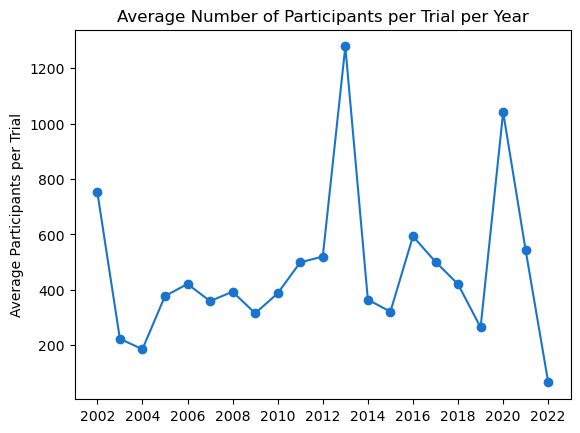

In [196]:
plt.plot(avg_part_year['year'], avg_part_year['average participants per trial'], marker='o', color='#1874CD')

# Set the x-axis tick positions and labels
plt.xticks(range(avg_part_year['year'].min(), avg_part_year['year'].max()+2, 2))

plt.ylabel('Average Participants per Trial')
plt.title('Average Number of Participants per Trial per Year')
plt.grid(False)

# Set the y-axis limit with a small gap at the start
# y_start = 0  # Adjust the gap as needed
# y_end = 35000  # Change the upper limit as needed
# plt.ylim(y_start, y_end)

# Save the chart as an image file
plt.savefig('/project/world/avg_participants_line.png', dpi=300)

plt.show()

## Phases

In [197]:
df_race_phase

phase  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0    Early Phase 1                            17.0                  242.0   
1   Not Applicable                         17249.0               184963.0   
2          Phase 1                           249.0                 7870.0   
3  Phase 1/Phase 2                          1040.0                 9530.0   
4          Phase 2                          6664.0                44414.0   
5  Phase 2/Phase 3                           866.0                 4834.0   
6          Phase 3                         34004.0               296309.0   
7          Phase 4                          2639.0                30161.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                  517.0                               5.0             363.0   
1               762653.0                           22528.0          226074.0   
2                 9083.0                             170.0            8355.0   
3                11093.0                             157.0            5145.0   
4                72234.0                            2200.0           70957.0   
5                14076.0                             158.0           13484.0   
6               221858.0                            4723.0          268020.0   
7               189424.0                            3238.0           42250.0   

   Middle Eastern    Mixed    Other  Unknown or Not Reported  \
0             0.0    115.0      0.0                    221.0   
1           191.0  49975.0  14886.0                 763238.0   
2            25.0   1026.0    194.0                   2741.0   
3             2.0   3065.0    281.0                   6814.0   
4           285.0  11260.0   2549.0                  35035.0   
5            36.0   1236.0     49.0                   7242.0   
6          1231.0  28073.0  24469.0                 215273.0   
7           215.0   9772.0   1610.0                  28871.0   

   White/ White Heritage  uk_races_dum  count  
0                 6159.0             0    145  
1              2649033.0            25   5792  
2                89479.0             5   1788  
3               121025.0             2   1483  
4               792354.0            40   6633  
5               119624.0             4    390  
6              3236978.0            52   3908  
7               479489.0            10   1945

In [198]:
df_race_phase_viz = df_race_phase.drop(['uk_races_dum','count'],axis=1)

In [199]:
# Drop the "Not Applicable" row
df_race_phase_viz = df_race_phase_viz[df_race_phase_viz['phase'] != 'Not Applicable']

In [200]:
df_race_phase_viz.to_csv('/project/world/df_race_phase_viz.csv')

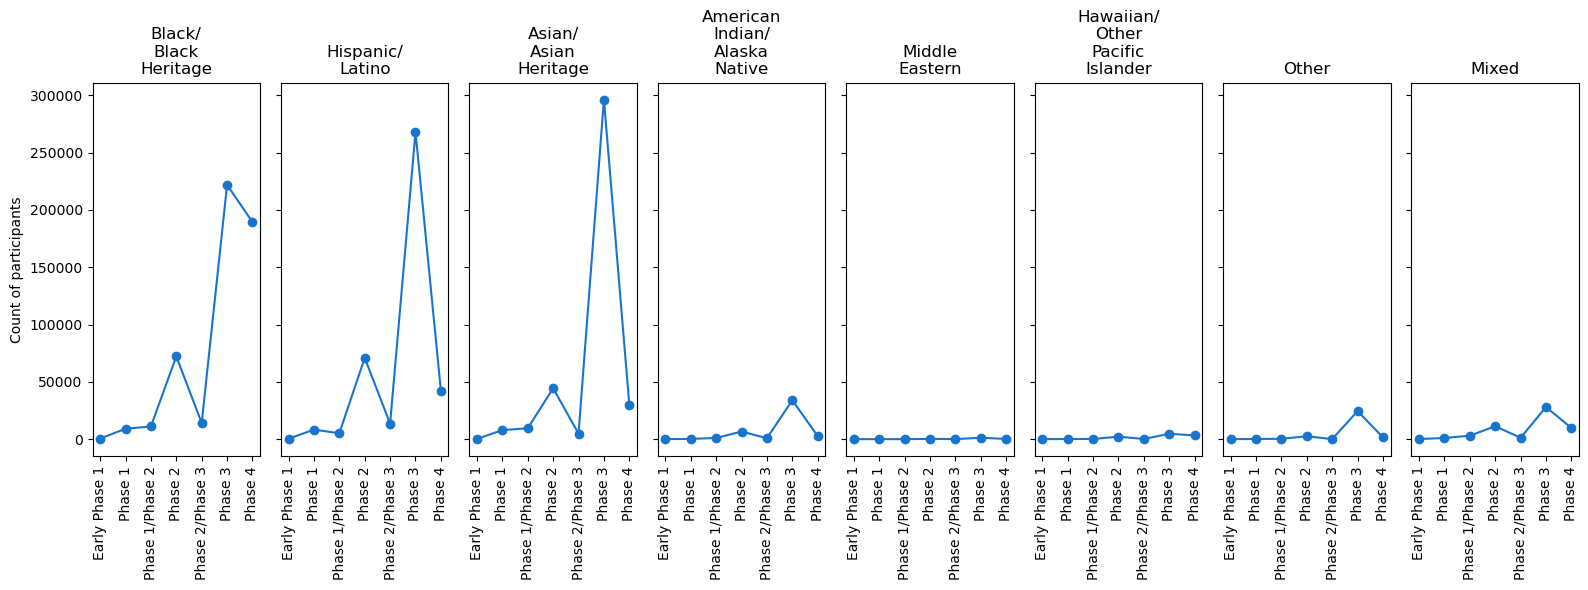

In [201]:
# Extract relevant columns for race/ethnicity and phase
race_ethnicity = ['Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']
phases = ['Early Phase 1', 'Phase 1', 'Phase 1/Phase 2', 'Phase 2', 'Phase 2/Phase 3', 'Phase 3', 'Phase 4']
df_plot = df_race_phase_viz[race_ethnicity + ['phase']]

# Set up the plot
fig, axs = plt.subplots(1, len(race_ethnicity), figsize=(16, 6), sharey=True)

# Plot each race next to each other
for i, race in enumerate(race_ethnicity):
    ax = axs[i]
    values = df_plot.loc[df_plot['phase'].isin(phases)][race].tolist()
    ax.plot(range(len(values)), values, marker='o', linestyle='-', color='#1874CD', label=race)

    # Set x-axis labels
    ax.set_xticks(range(len(phases)))
    ax.set_xticklabels(phases, rotation=90)

    # Set y-axis label (only for the first subplot)
    if i == 0:
        ax.set_ylabel('Count of participants')

    # Wrap the race name and set title
    wrapped_race = '\n'.join(textwrap.wrap(race, width=10))
    ax.set_title(wrapped_race)

# Adjust spacing between subplots
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/world/participants_phase_notWhite.png', dpi=300)

# Show the plots
plt.show()

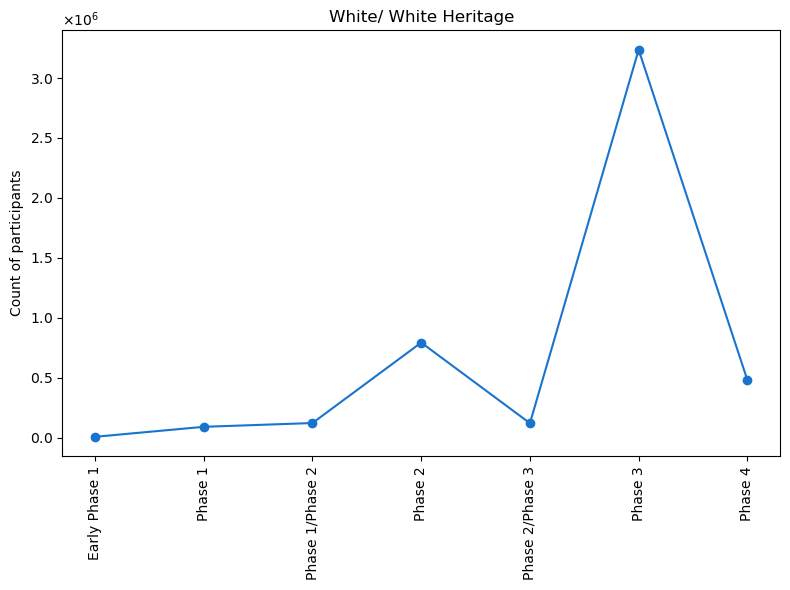

In [202]:
# Extract relevant columns for race/ethnicity and phase
race_ethnicity = ['White/ White Heritage']
phases = ['Early Phase 1', 'Phase 1', 'Phase 1/Phase 2', 'Phase 2', 'Phase 2/Phase 3', 'Phase 3', 'Phase 4']
df_plot = df_race_phase_viz[race_ethnicity + ['phase']]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the race
values = df_plot.loc[df_plot['phase'].isin(phases)][race_ethnicity[0]].tolist()
ax.plot(range(len(values)), values, marker='o', linestyle='-', color='#1874CD', label=race_ethnicity[0])

# Set x-axis labels
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(phases, rotation=90)

# Set y-axis label
ax.set_ylabel('Count of participants')

# Set title and legend
ax.set_title(race_ethnicity[0])

# Format y-axis tick labels as whole numbers
plt.gca().get_yaxis().set_major_formatter(plt.ScalarFormatter(useOffset=False, useMathText=True))

# Adjust padding around the figure
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/world/participants_phase_WHITE.png', dpi=300)

# Show the plot
plt.show()

In [203]:
# Calculate the sum for each row
df_race_phase_viz['Phase total'] = df_race_phase_viz.sum(axis=1)

/tmp/ipykernel_138/3369688594.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [204]:
df_race_phase_viz

phase  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0    Early Phase 1                            17.0                  242.0   
2          Phase 1                           249.0                 7870.0   
3  Phase 1/Phase 2                          1040.0                 9530.0   
4          Phase 2                          6664.0                44414.0   
5  Phase 2/Phase 3                           866.0                 4834.0   
6          Phase 3                         34004.0               296309.0   
7          Phase 4                          2639.0                30161.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                  517.0                               5.0             363.0   
2                 9083.0                             170.0            8355.0   
3                11093.0                             157.0            5145.0   
4                72234.0                            2200.0           70957.0   
5                14076.0                             158.0           13484.0   
6               221858.0                            4723.0          268020.0   
7               189424.0                            3238.0           42250.0   

   Middle Eastern    Mixed    Other  Unknown or Not Reported  \
0             0.0    115.0      0.0                    221.0   
2            25.0   1026.0    194.0                   2741.0   
3             2.0   3065.0    281.0                   6814.0   
4           285.0  11260.0   2549.0                  35035.0   
5            36.0   1236.0     49.0                   7242.0   
6          1231.0  28073.0  24469.0                 215273.0   
7           215.0   9772.0   1610.0                  28871.0   

   White/ White Heritage  Phase total  
0                 6159.0       7639.0  
2                89479.0     119192.0  
3               121025.0     158152.0  
4               792354.0    1037952.0  
5               119624.0     161605.0  
6              3236978.0    4330938.0  
7               479489.0     787669.0

In [205]:
# Calculate the percentage for each race in each phase
races = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed','Unknown or Not Reported']

for race in races:
    df_race_phase_viz[race + ' (%)'] = round((df_race_phase_viz[race] / df_race_phase_viz['Phase total']) * 100,2)
    
df_race_phase_viz

phase  American Indian/ Alaska Native  Asian/ Asian Heritage  \
0    Early Phase 1                            17.0                  242.0   
2          Phase 1                           249.0                 7870.0   
3  Phase 1/Phase 2                          1040.0                 9530.0   
4          Phase 2                          6664.0                44414.0   
5  Phase 2/Phase 3                           866.0                 4834.0   
6          Phase 3                         34004.0               296309.0   
7          Phase 4                          2639.0                30161.0   

   Black/ Black Heritage  Hawaiian/ Other Pacific Islander  Hispanic/ Latino  \
0                  517.0                               5.0             363.0   
2                 9083.0                             170.0            8355.0   
3                11093.0                             157.0            5145.0   
4                72234.0                            2200.0           70957.0   
5                14076.0                             158.0           13484.0   
6               221858.0                            4723.0          268020.0   
7               189424.0                            3238.0           42250.0   

   Middle Eastern    Mixed    Other  Unknown or Not Reported  ...  \
0             0.0    115.0      0.0                    221.0  ...   
2            25.0   1026.0    194.0                   2741.0  ...   
3             2.0   3065.0    281.0                   6814.0  ...   
4           285.0  11260.0   2549.0                  35035.0  ...   
5            36.0   1236.0     49.0                   7242.0  ...   
6          1231.0  28073.0  24469.0                 215273.0  ...   
7           215.0   9772.0   1610.0                  28871.0  ...   

   White/ White Heritage (%)  Black/ Black Heritage (%)  Hispanic/ Latino (%)  \
0                      80.63                       6.77                  4.75   
2                      75.07                       7.62                  7.01   
3                      76.52                       7.01                  3.25   
4                      76.34                       6.96                  6.84   
5                      74.02                       8.71                  8.34   
6                      74.74                       5.12                  6.19   
7                      60.87                      24.05                  5.36   

   Asian/ Asian Heritage (%)  American Indian/ Alaska Native (%)  \
0                       3.17                                0.22   
2                       6.60                                0.21   
3                       6.03                                0.66   
4                       4.28                                0.64   
5                       2.99                                0.54   
6                       6.84                                0.79   
7                       3.83                                0.34   

   Middle Eastern (%)  Hawaiian/ Other Pacific Islander (%)  Other (%)  \
0                0.00                                  0.07       0.00   
2                0.02                                  0.14       0.16   
3                0.00                                  0.10       0.18   
4                0.03                                  0.21       0.25   
5                0.02                                  0.10       0.03   
6                0.03                                  0.11       0.56   
7                0.03                                  0.41       0.20   

   Mixed (%)  Unknown or Not Reported (%)  
0       1.51                         2.89  
2       0.86                         2.30  
3       1.94                         4.31  
4       1.08                         3.38  
5       0.76                         4.48  
6       0.65                         4.97  
7       1.24                         3.67  

[7 rows x 22 columns]

In [206]:
df_race_phase_perc = df_race_phase_viz.iloc[:,[0,12,13,14,15,16,17,18,19,20,21]]

In [207]:
df_race_phase_perc.to_csv('/project/world/df_race_phase_perc.csv')

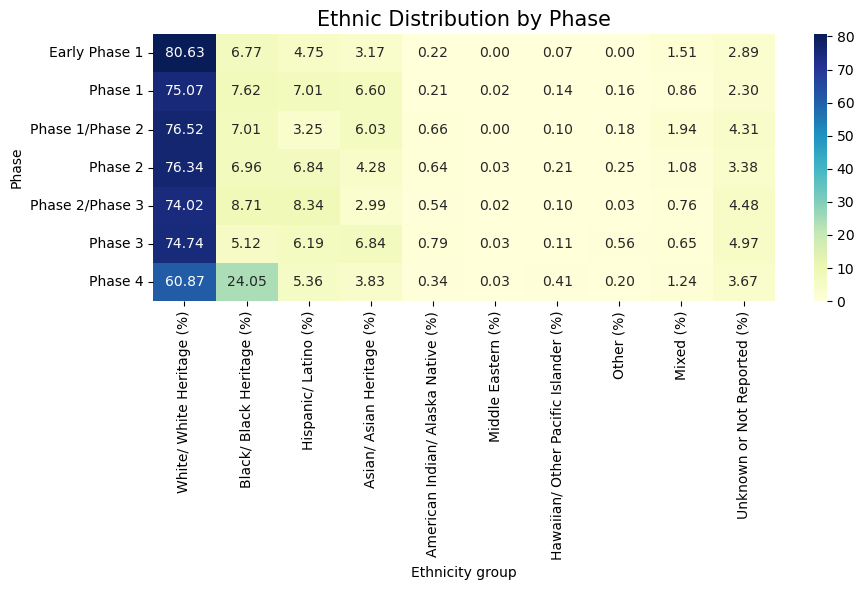

In [208]:
# Set the "Phase" column as the index
df_race_phase_perc.set_index('phase', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_race_phase_perc, annot=True, fmt=".2f", cmap='YlGnBu')

# Customize the plot
plt.title('Ethnic Distribution by Phase', fontsize=15)
plt.xlabel('Ethnicity group')
plt.ylabel('Phase')

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1]) 

# Save the chart as an image file
plt.savefig('/project/world/heatmap_race_phase.png', dpi=300)

# Display the heatmap
plt.show()

## Phase, Status  and Countires

In [209]:
trials_countries = pd.merge(uk_filtered, countries,on='nct_id',how='left')

In [210]:
trials_countries.nct_id.nunique()

322824

In [211]:
trials_countries.head()

nct_id  start_date                                        brief_title  \
0  NCT04311983  2020-03-31  Interventions to Help More Low-income Smokers ...   
1  NCT04841135  2021-06-03  Blood Microbiota Signature of Alzheimer's Disease   
2  NCT03228355  2017-05-24  Headache Inducing Effect of Cromakalim in Migr...   
3  NCT05021289  2021-02-01  Guided Imagery on the Perceived Stress Level i...   
4  NCT03228277  2017-07-17  Olmutinib Trial in T790M (+) NSCLC Patients De...   

                                      official_title          overall_status  \
0  Expanding Population-level Interventions to He...  Active, not recruiting   
1  Analysis of the Blood Signature of the Microbi...              Recruiting   
2  The Effects of Levcromakalim on Cerebral Hemod...               Completed   
3  Effect of the Practice of Guided Imagery on th...               Completed   
4  Phase II, Multicenter, Single-arm, Open-label ...               Completed   

            phase  enrollment enrollment_type  number_of_arms  results  \
0  Not Applicable      1982.0          Actual             2.0        0   
1  Not Applicable       120.0     Anticipated             3.0        0   
2  Not Applicable        16.0          Actual             2.0        0   
3  Not Applicable       128.0          Actual             2.0        0   
4         Phase 2        25.0          Actual             1.0        0   

           id                name removed  
0  33231375.0       United States   False  
1  33231376.0              France   False  
2  33098439.0             Denmark   False  
3  33098441.0              Turkey   False  
4  33098442.0  Korea, Republic of   False

In [212]:
trials_countries['count'] = 1

In [213]:
phase_map = trials_countries.groupby(['phase','name','overall_status']).sum()

/tmp/ipykernel_138/1887255667.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [214]:
phase_map.reset_index(inplace=True)

In [215]:
phase_map.rename(columns={'name': 'country'},inplace=True)

In [216]:
phase_map.head()

phase    country          overall_status  enrollment  \
0  Early Phase 1  Argentina              Recruiting      2960.0   
1  Early Phase 1  Argentina              Terminated         4.0   
2  Early Phase 1  Argentina          Unknown status       180.0   
3  Early Phase 1  Australia  Active, not recruiting        60.0   
4  Early Phase 1  Australia               Completed       185.0   

   number_of_arms  results           id  count  
0             1.0        0   33505575.0      1  
1             1.0        0   33098066.0      1  
2             2.0        0   32998229.0      1  
3             6.0        0   66328676.0      2  
4            15.0        0  198238343.0      6

In [217]:
phase_map.to_csv('/project/world/phase_map.csv')

The above dataframe was used in Tableau to create an interavtive map.

# Cancer

In [218]:
uk_filtered.head()

nct_id  start_date                                        brief_title  \
0  NCT04311983  2020-03-31  Interventions to Help More Low-income Smokers ...   
1  NCT04841135  2021-06-03  Blood Microbiota Signature of Alzheimer's Disease   
2  NCT03228355  2017-05-24  Headache Inducing Effect of Cromakalim in Migr...   
3  NCT05021289  2021-02-01  Guided Imagery on the Perceived Stress Level i...   
4  NCT03228277  2017-07-17  Olmutinib Trial in T790M (+) NSCLC Patients De...   

                                      official_title          overall_status  \
0  Expanding Population-level Interventions to He...  Active, not recruiting   
1  Analysis of the Blood Signature of the Microbi...              Recruiting   
2  The Effects of Levcromakalim on Cerebral Hemod...               Completed   
3  Effect of the Practice of Guided Imagery on th...               Completed   
4  Phase II, Multicenter, Single-arm, Open-label ...               Completed   

            phase  enrollment enrollment_type  number_of_arms  results  
0  Not Applicable      1982.0          Actual             2.0        0  
1  Not Applicable       120.0     Anticipated             3.0        0  
2  Not Applicable        16.0          Actual             2.0        0  
3  Not Applicable       128.0          Actual             2.0        0  
4         Phase 2        25.0          Actual             1.0        0

In [219]:
import pandas as pd

# Create a list of cancer-related terms
cancer_terms = ['cancer', 'tumor', 'tumour', 'carcinoma', 'lymphoma', 'leukemia', 'sarcoma', 'glioblastoma',
                'glioma', 'neuroblastoma', 'papilloma', 'melanoma', 'metastasis', 'malignant', 'benign',
                'leukemia', 'histiocytoma', 'adenocarcinoma', 'aldosteronoma', 'adamantinoma', 'ameloblastoma',
                'angiofibroma', 'angiosarcoma', 'astroblastoma', 'astrocytoma', 'liponeurocytoma', 'cholangiocarcinoma',
                'chondroblastoma', 'chondrosarcoma', 'chordoma', 'nephroma', 'craniopharyngioma', 'cystadenoma',
                'nephroblastoma', 'chondrosarcoma', 'trichoepithelioma', 'ependymoma', 'hemangioendothelioma',
                'erythroleukemia', 'fibroadenoma', 'fibrosarcoma', 'germinoma', 'glioblastoma', 'osteosarcoma',
                'rhabdomyosarcoma', 'leiomyosarcoma', 'myxosarcoma', 'mesenchymoma', 'astrocytoma', 'ependymoma',
                'neuroblastoma', 'oligodendroglioma', 'pheochromocytoma', 'retinoblastoma', 'cholangiocarcinoma',
                'myelodysplastic', 'liposarcoma', 'histiocytoma', 'macroglobulinaemia', 'polycythaemia vera',
                'essential thrombocythaemia', 'myelofibrosis', 'gastrinoma', 'hemangioendothelioma', 'hepatoblastoma',
                'insulinoma', 'keratoacanthoma', 'leiomyosarcoma', 'liposarcoma', 'mesenchymoma', 'medulloepithelioma',
                'meningioma', 'nephroma', 'myxofibrosarcoma', 'nephroblastoma', 'esthesioneuroblastoma', 'pheochromocytoma',
                'pineoblastoma', 'plasmacytoma', 'prolactinoma', 'fibrosarcoma', 'somatostatinoma', 'haemangioblastoma',
                'thymoma', 'seminoma', 'dysgerminoma', 'oncocytic', 'paraganglioma', 'teratoma', 'mesothelioma',
                'neoplasia', 'phaeochromocytoma', 'acoustic neuroma', 'neuroma', 'nephroblastoma', 'mycosis fungoides',
                'vipoma', 'oncocytic', 'oncocytomas', 'teratoma', 'gestational trophoblastic disease', 'hodgkin',
                'burkitt', 'wilms', 'kaposi', 'paget', 'edwig', 'schwannoma', 'verner-morrison', 'waldenström',
                'von recklinghausen', 'von hippel-lindau', 'peutz-jeghers', 'neurofibromatosis type 2', 'carney', 'gorlin']

# Create a regex pattern by joining the cancer terms and making them case-insensitive
pattern = re.compile(r'|'.join(cancer_terms), re.IGNORECASE)

# Filter for cancer-related trials
cancer_df = uk_filtered[
    (uk_filtered['official_title'].str.contains(pattern, na=False)) |
    (uk_filtered['brief_title'].str.contains(pattern, na=False))
]

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57097 entries, 17 to 322823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nct_id           57097 non-null  object 
 1   start_date       57097 non-null  object 
 2   brief_title      57097 non-null  object 
 3   official_title   56622 non-null  object 
 4   overall_status   57097 non-null  object 
 5   phase            57097 non-null  object 
 6   enrollment       56695 non-null  float64
 7   enrollment_type  56006 non-null  object 
 8   number_of_arms   53399 non-null  float64
 9   results          57097 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 4.8+ MB


In [220]:
cancer_df.nct_id.nunique()

57097

There are **57097** trials from 2002-2022 that were focused on cancer related deseases (e.g., cacner, lymphoma, glioblastoma, metastasis, malignant, benign, leukemia).

Using CHAT-GPT:

This dictionary is a rough approximation based on the majority of the cancer types listed. Please note that many cancer types can affect multiple organ systems or may not fit neatly into one category. Also, some specific syndromes (like Von Hippel-Lindau or Gorlin syndrome) are associated with multiple different types of tumors that can affect multiple organ systems, so they are placed under 'Multiple Locations'.

In [221]:
cancer_to_organ = {
    # Brain / Nervous System
    'glioblastoma': 'Brain/Nervous System',
    'glioma': 'Brain/Nervous System',
    'neuroblastoma': 'Brain/Nervous System',
    'astroblastoma': 'Brain/Nervous System',
    'astrocytoma': 'Brain/Nervous System',
    'craniopharyngioma': 'Brain/Nervous System',
    'ependymoma': 'Brain/Nervous System',
    'meningioma': 'Brain/Nervous System',
    'esthesioneuroblastoma': 'Brain/Nervous System',
    'pineoblastoma': 'Brain/Nervous System',
    'schwannoma': 'Brain/Nervous System',
    'acoustic neuroma': 'Brain/Nervous System',
    'neuroma': 'Brain/Nervous System',
    'neurofibromatosis type 2': 'Brain/Nervous System',
    # Skin
    'melanoma': 'Skin',
    'kaposi': 'Skin',
    'mycosis fungoides': 'Skin',
    'keratoacanthoma': 'Skin',
    # Breast
    'paget': 'Breast',
    'fibroadenoma': 'Breast',
    # Blood / Lymphatic System
    'leukemia': 'Blood/Lymphatic System',
    'lymphoma': 'Blood/Lymphatic System',
    'myelodysplastic': 'Blood/Lymphatic System',
    'polycythaemia vera': 'Blood/Lymphatic System',
    'essential thrombocythaemia': 'Blood/Lymphatic System',
    'myelofibrosis': 'Blood/Lymphatic System',
    'waldenström': 'Blood/Lymphatic System',
    'hodgkin': 'Blood/Lymphatic System',
    'burkitt': 'Blood/Lymphatic System',
    # Bone
    'sarcoma': 'Bone',
    'osteosarcoma': 'Bone',
    'chondroblastoma': 'Bone',
    'chondrosarcoma': 'Bone',
    'edwig': 'Bone',
    'myxosarcoma': 'Bone',
    # Lung
    'mesothelioma': 'Lung',
    # Gastrointestinal Tract / Digestive System
    'carcinoma': 'Gastrointestinal/Digestive System',
    'cholangiocarcinoma': 'Gastrointestinal/Digestive System',
    'gastrinoma': 'Gastrointestinal/Digestive System',
    'somatostatinoma': 'Gastrointestinal/Digestive System',
    'insulinoma': 'Gastrointestinal/Digestive System',
    'vipoma': 'Gastrointestinal/Digestive System',
    'peutz-jeghers': 'Gastrointestinal/Digestive System',
    # Liver
    'hepatoblastoma': 'Liver',
    'histiocytoma': 'Liver',
    # Pancreas
    'insulinoma': 'Pancreas',
    # Endocrine System
    'aldosteronoma': 'Endocrine System',
    'pheochromocytoma': 'Endocrine System',
    'prolactinoma': 'Endocrine System',
    'somatostatinoma': 'Endocrine System',
    'verner-morrison': 'Endocrine System',
    # Eye
    'retinoblastoma': 'Eye',
    'melanoma': 'Eye',  # Melanoma can affect the skin or the eye.
    # Kidney
    'nephroma': 'Kidney',
    'nephroblastoma': 'Kidney',
    'wilms': 'Kidney',
    # Others (hard to categorize or can appear in multiple locations)
    'tumor': 'Multiple Locations',
    'tumour': 'Multiple Locations',
    'metastasis': 'Multiple Locations',
    'malignant': 'Multiple Locations',
    'benign': 'Multiple Locations',
    'neoplasia': 'Multiple Locations',
    'oncocytic': 'Multiple Locations',
    'teratoma': 'Multiple Locations',
    'neoplasia': 'Multiple Locations',
    'von recklinghausen': 'Multiple Locations',
    'von hippel-lindau': 'Multiple Locations',
    'carney': 'Multiple Locations',
    'gorlin': 'Multiple Locations',
}

In [222]:
def map_cancer_to_organ(row):
    official_title = row['official_title']
    brief_title = row['brief_title']

    if pd.isna(official_title):
        official_title = ''
    else:
        official_title = official_title.lower()
    
    if pd.isna(brief_title):
        brief_title = ''
    else:
        brief_title = brief_title.lower()
        
    for key, value in cancer_to_organ.items():
        if key in official_title or key in brief_title:
            return value
    return None

cancer_df['cancer_areas'] = cancer_df.apply(map_cancer_to_organ, axis=1)

/tmp/ipykernel_138/2539205775.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
cancer_df.cancer_areas.value_counts()

Multiple Locations                   8998
Blood/Lymphatic System               7855
Gastrointestinal/Digestive System    7625
Brain/Nervous System                 2171
Eye                                  1782
Bone                                  949
Lung                                  234
Skin                                  117
Breast                                 20
Endocrine System                       12
Kidney                                 10
Pancreas                                9
Liver                                   8
Name: cancer_areas, dtype: int64

In [224]:
cancer_areas_countries = pd.merge(cancer_df,countries,on='nct_id',how='left')
cancer_areas_countries.head()

nct_id  start_date                                        brief_title  \
0  NCT00064974  2003-06-30  Efficacy and Safety Study of CC-5013 Monothera...   
1  NCT00064974  2003-06-30  Efficacy and Safety Study of CC-5013 Monothera...   
2  NCT00064974  2003-06-30  Efficacy and Safety Study of CC-5013 Monothera...   
3  NCT00064974  2003-06-30  Efficacy and Safety Study of CC-5013 Monothera...   
4  NCT00064974  2003-06-30  Efficacy and Safety Study of CC-5013 Monothera...   

                                      official_title overall_status    phase  \
0  A Multicenter, Single-Arm, Open-Label Study of...      Completed  Phase 2   
1  A Multicenter, Single-Arm, Open-Label Study of...      Completed  Phase 2   
2  A Multicenter, Single-Arm, Open-Label Study of...      Completed  Phase 2   
3  A Multicenter, Single-Arm, Open-Label Study of...      Completed  Phase 2   
4  A Multicenter, Single-Arm, Open-Label Study of...      Completed  Phase 2   

   enrollment enrollment_type  number_of_arms  results  \
0       215.0          Actual             1.0        0   
1       215.0          Actual             1.0        0   
2       215.0          Actual             1.0        0   
3       215.0          Actual             1.0        0   
4       215.0          Actual             1.0        0   

             cancer_areas          id            name removed  
0  Blood/Lymphatic System  33343875.0   United States   False  
1  Blood/Lymphatic System  33343876.0       Australia   False  
2  Blood/Lymphatic System  33343877.0         Belgium   False  
3  Blood/Lymphatic System  33343878.0  Czech Republic   False  
4  Blood/Lymphatic System  33343879.0         Denmark   False

In [225]:
cancer_areas_countries.rename(columns={'name': 'country'},inplace=True)

In [226]:
cancer_areas_countries.to_csv('/project/world/cancer_areas_countries.csv')

In [227]:
cancer_df['results'].value_counts(normalize=True)

0    0.812792
1    0.187208
Name: results, dtype: float64

**18.7%** of those trials released results.

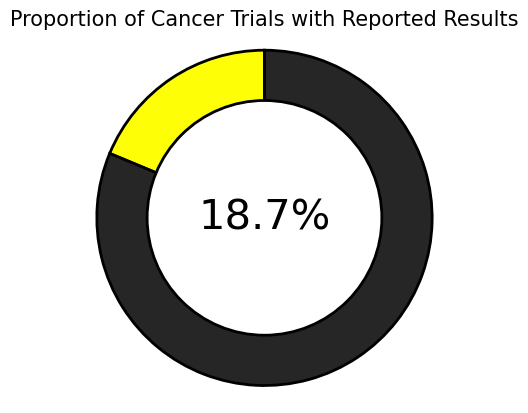

In [228]:
# Calculate the counts
cancer_count_results = cancer_df['results'].sum()
cancer_count_no_results = len(cancer_df) - cancer_count_results

# Calculate the proportions
cancer_total_trials = len(cancer_df)
cancer_proportion_results = cancer_count_results / cancer_total_trials
cancer_proportion_no_results = cancer_count_no_results / cancer_total_trials

# Create the donut chart
labels = ['Results Reported', 'Results Not Reported']
sizes = [cancer_proportion_results, cancer_proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Cancer Trials with Reported Results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{cancer_proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/world/cancer_donut_chart.png', dpi=300)

# Display the chart
plt.show()

In [229]:
cancer_df_res = cancer_df[cancer_df['results']==1]

In [230]:
print('There are ' + str(cancer_df_res.nct_id.nunique()) + ' trials that released results and are focused around cancer research.')

There are 10689 trials that released results and are focused around cancer research.


In [231]:
cancer_race = pd.merge(cancer_df_res, df_race_trials, on='nct_id',how='inner')

cancer_race.head()

nct_id start_date_x  \
0  NCT02987829   2017-05-23   
1  NCT02988843   2017-03-29   
2  NCT03190083   2017-07-01   
3  NCT01683422   2013-01-02   
4  NCT03194373   2017-10-12   

                                         brief_title  \
0  Phase 1/2A Study of TRC253, an Androgen Recept...   
1  Study of Brentuximab Vedotin And Bevacizumab I...   
2  Efficacy of Digital Breast Tomosynthesis + Sta...   
3  Chemotherapy Plus Proton-chemotherapy for Loca...   
4  Phase II Trial Evaluating the Efficacy of Palb...   

                                      official_title overall_status  \
0  An Open-label Phase 1/2A Study To Evaluate the...      Completed   
1  Phase II Study of Brentuximab Vedotin and Beva...     Terminated   
2  Efficacy of Digital Breast Tomosynthesis (DBT)...      Completed   
3  A Phase II Trial of Gemcitabine and Erlotinib ...     Terminated   
4  A Multi-Center Open Label Single Arm Phase II ...      Completed   

             phase  enrollment enrollment_type  number_of_arms  results  ...  \
0  Phase 1/Phase 2        72.0          Actual             6.0        1  ...   
1          Phase 2         1.0          Actual             1.0        1  ...   
2   Not Applicable        16.0          Actual             1.0        1  ...   
3   Not Applicable         9.0          Actual             1.0        1  ...   
4          Phase 2        21.0          Actual             1.0        1  ...   

  Hawaiian/ Other Pacific Islander Hispanic/ Latino  Middle Eastern  Mixed  \
0                              0.0              0.0             0.0    0.0   
1                              0.0              0.0             0.0    0.0   
2                              0.0              0.0             0.0    0.0   
3                              0.0              0.0             0.0    2.0   
4                              0.0              0.0             0.0    0.0   

   Other  Unknown or Not Reported  White/ White Heritage  uk_races_dum  count  \
0    0.0                      8.0                  114.0             0      1   
1    0.0                      0.0                    2.0             0      1   
2    0.0                      2.0                   25.0             0      1   
3    0.0                      1.0                    6.0             0      1   
4    0.0                      0.0                   19.0             0      1   

   year  
0  2017  
1  2017  
2  2017  
3  2013  
4  2017  

[5 rows x 25 columns]

In [232]:
print('There are ' + str(cancer_race.nct_id.nunique()) + ' trials that released results on race and are focused around cancer research.')

There are 5135 trials that released results on race and are focused around cancer research.


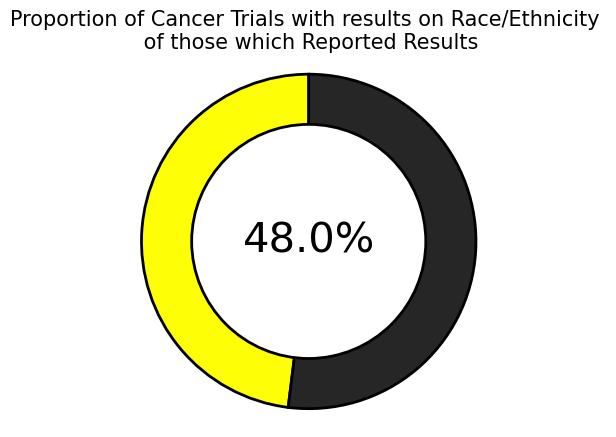

In [233]:
# Calculate the counts
cancer_count_results = cancer_race.nct_id.nunique()
cancer_count_no_results = cancer_df_res.nct_id.nunique() - cancer_count_results

# Calculate the proportions
cancer_total_trials = cancer_df_res.nct_id.nunique()
cancer_proportion_results = cancer_count_results / cancer_total_trials
cancer_proportion_no_results = cancer_count_no_results / cancer_total_trials

# Create the donut chart
labels = ['Results Reported', 'Results Not Reported']
sizes = [cancer_proportion_results, cancer_proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Cancer Trials with results on Race/Ethnicity \n of those which Reported Results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{cancer_proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/world/cancer_race_results_donut_chart.png', dpi=300)

# Display the chart
plt.show()

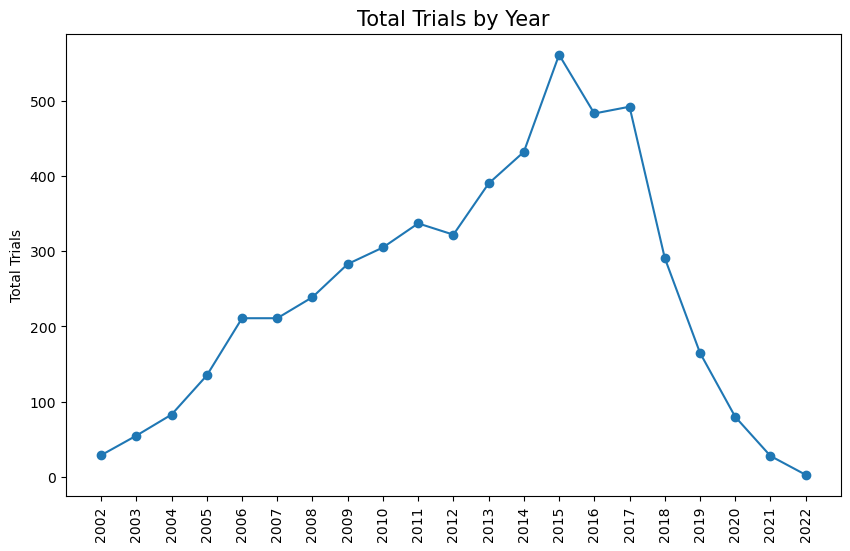

In [234]:
# Group the trials by year and calculate the total count
trial_count_by_year = cancer_race.groupby('year')['count'].sum()

# Plot the total trials by year
plt.figure(figsize=(10, 6))
trial_count_by_year.plot(marker='o')
plt.ylabel('Total Trials')
plt.xlabel('')
plt.title('Total Trials by Year', fontsize=15)
plt.xticks(range(min(cancer_race['year']), max(cancer_race['year'])+1), rotation=90)
plt.xlim(min(cancer_race['year'])-1, max(cancer_race['year'])+1)
plt.grid(False)

# Save the chart as an image file
plt.savefig('/project/world/Cancer_trials_years.png', dpi=300)

plt.show()

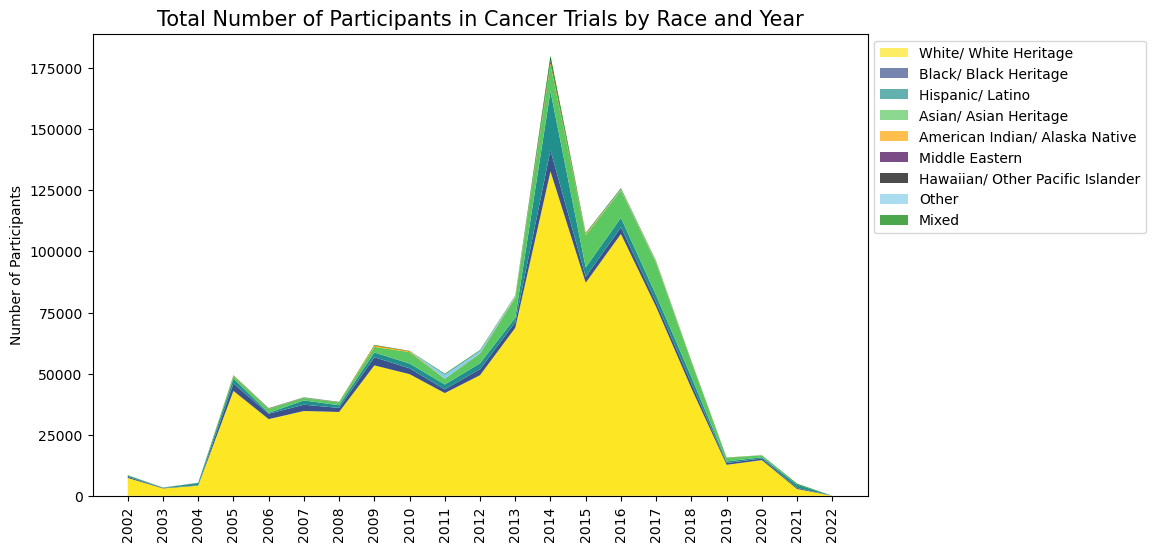

In [235]:
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

# Extract unique race/ethnicity values
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby(['year'])[race_ethnicities].sum()

# Create the stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(race_count_by_year.index, race_count_by_year.values.T, labels=race_ethnicities, colors=colors[:len(race_ethnicities)])

# Add the custom legend
patch_handles = [mpatches.Patch(facecolor=colors[i], alpha=0.7) for i in range(len(race_ethnicities))]
legend_labels = race_ethnicities
plt.legend(patch_handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.ylabel('Number of Participants')
plt.title('Total Number of Participants in Cancer Trials by Race and Year', fontsize=15)
plt.xticks(range(min(cancer_race['year']), max(cancer_race['year'])+1), rotation=90)
plt.xlim(min(cancer_race['year'])-1, max(cancer_race['year'])+1)
plt.grid(False)

# Save the chart as an image file using the savefig() function
plt.savefig('/project/world/Cancer_trials_stacked_area_years.png', dpi=300)

plt.show()


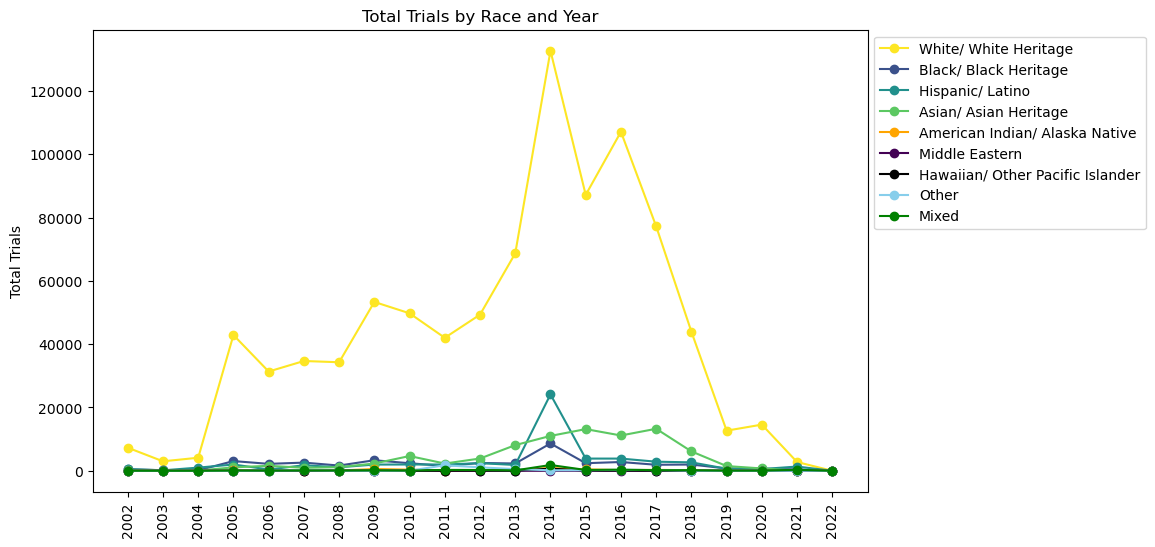

In [238]:
# Define the colors for each race/ethnicity
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby(['year'])[race_ethnicities].sum()

# Plot the lines for each race
plt.figure(figsize=(10, 6))
for i, race in enumerate(race_count_by_year.columns):
    plt.plot(race_count_by_year.index, race_count_by_year[race], marker='o', color=colors[i], label=race)

plt.ylabel('Total Trials')
plt.title('Total Trials by Race and Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(min(cancer_race['year']), max(cancer_race['year'])+1), rotation=90)
plt.xlim(min(cancer_race['year'])-1, max(cancer_race['year'])+1)
plt.grid(False)

# Save the chart as an image file using the savefig() function
plt.savefig('/project/world/Cancer_trials_years_all.png', dpi=300)

plt.show()

In [239]:
# Define the colors for each race/ethnicity
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby(['year'])[race_ethnicities].sum()

# Create an empty list to store the line traces
data = []

# Create a line trace for each race
for i, race in enumerate(race_count_by_year.columns):
    trace = go.Scatter(
        x=race_count_by_year.index,
        y=race_count_by_year[race],
        mode='lines+markers',
        name=race,
        marker=dict(
            color=colors[i]
        )
    )
    data.append(trace)

# Create the layout
layout = go.Layout(
    title='Total Trials by Race and Year',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        tick0=min(cancer_race['year']),
        dtick=1,
        tickangle=90
    ),
    yaxis=dict(
        title='Total Trials'
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)

# Create the figure and plot the chart
fig = go.Figure(data=data, layout=layout)
fig.show()


<Figure size 1000x800 with 0 Axes>

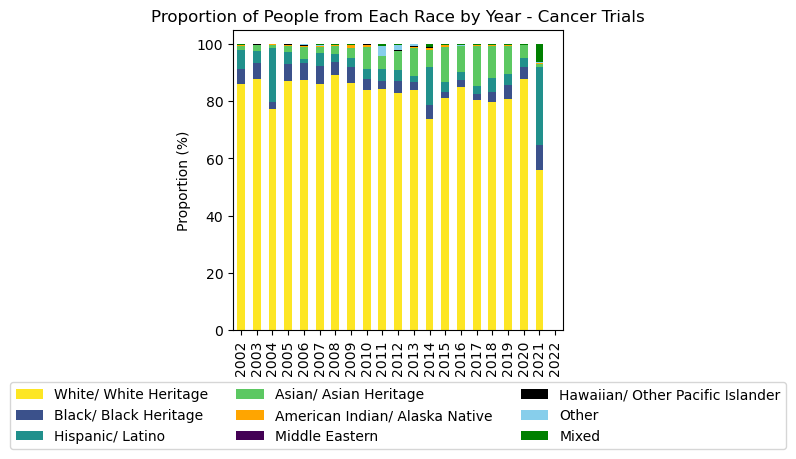

In [244]:
# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby('year')[['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino',
                                                  'Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 
                                                  'Middle Eastern' ,'Hawaiian/ Other Pacific Islander',
                                                  'Other' ,'Mixed']].sum()

# Calculate the proportion for each race by year
race_proportion_by_year = race_count_by_year.div(race_count_by_year.sum(axis=1), axis=0)

# Define the colors for each race/ethnicity
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154', 'black', 'skyblue', 'green']

# Plot the composite bar chart
plt.figure(figsize=(10, 8))

# Plot the stacked bar chart
race_proportion_by_year.plot(kind='bar', stacked=True, color=colors)

plt.ylabel('Proportion (%)')
plt.xlabel('')
plt.title('Proportion of People from Each Race by Year - Cancer Trials')
plt.grid(False)

# Rearrange the legend in a 3x3 grid below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Multiply y-axis labels by 100
formatter = ticker.FuncFormatter(lambda x, pos: f'{x * 100:.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Save the chart as an image file without getting cut
plt.savefig('/project/world/stacked_bar_CANCER_100.png', dpi=300, bbox_inches='tight')

plt.show()


In [245]:
race_proportion_by_year.to_csv('/project/world/website_race_proportion.csv')

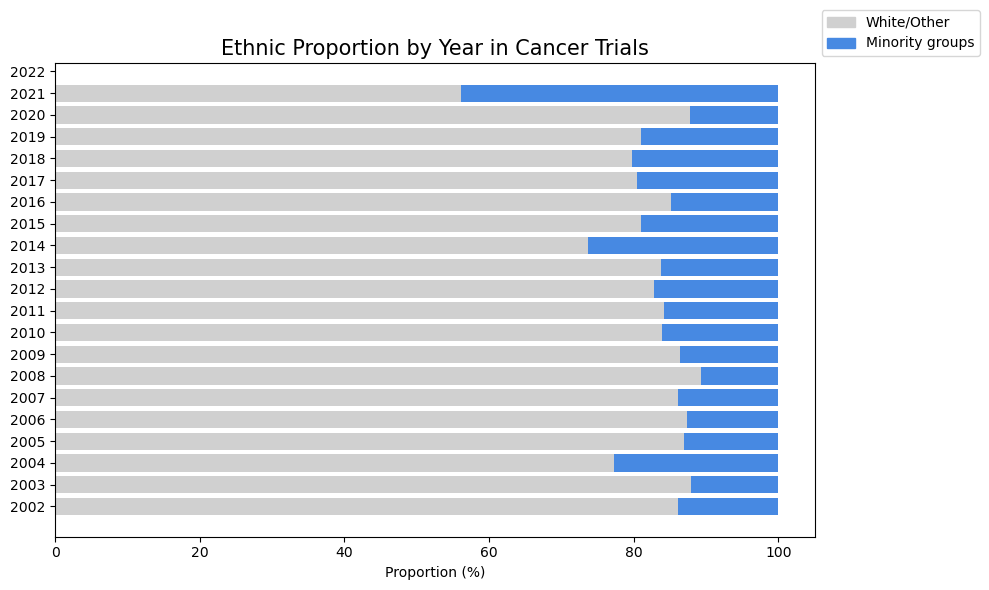

In [246]:
# Define the race categories and colors
race_categories = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']
race_colors = ['#d0d0d0', '#4789e2', '#4789e2', '#4789e2','#4789e2', '#4789e2', '#4789e2','#4789e2', '#4789e2']

# Set the years and their index positions
years = race_proportion_by_year.index
years_idx = range(len(years))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the horizontal stacked bars
bars = []
for i, race in enumerate(race_categories):
    proportion = race_proportion_by_year.loc[:, race] * 100
    bottom = race_proportion_by_year.loc[:, race_categories[:i]].sum(axis=1) * 100
    bars.append(ax.barh(years_idx, proportion, color=race_colors[i], left=bottom))

# Set the y-axis ticks and labels
ax.set_yticks(years_idx)
ax.set_yticklabels(years)

# Set the x-axis label
ax.set_xlabel('Proportion (%)')

# Set the chart title
ax.set_title('Ethnic Proportion by Year in Cancer Trials', fontsize=15)

# Create a custom legend
legend_labels = ['White/Other','Minority groups']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=race_colors[0]), plt.Rectangle((0, 0), 1, 1, color=race_colors[-1])]
ax.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1))

# Adjust the layout
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/world/horizontal_stacked_bar_chart.png', dpi=300)

# Show the plot
plt.show()

In [247]:
cancer_race_dummies = cancer_race.copy()

# Create dummy variables for race columns
race_columns = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Convert zeros to null for race columns
cancer_race_dummies[race_columns] = cancer_race_dummies[race_columns].replace(0, np.nan)

# Convert null values to 0 and non-null values to 1 for race columns
cancer_race_dummies[race_columns] = cancer_race_dummies[race_columns].notnull().astype(int).fillna(0)

cancer_race_dummies.head()

nct_id start_date_x  \
0  NCT02987829   2017-05-23   
1  NCT02988843   2017-03-29   
2  NCT03190083   2017-07-01   
3  NCT01683422   2013-01-02   
4  NCT03194373   2017-10-12   

                                         brief_title  \
0  Phase 1/2A Study of TRC253, an Androgen Recept...   
1  Study of Brentuximab Vedotin And Bevacizumab I...   
2  Efficacy of Digital Breast Tomosynthesis + Sta...   
3  Chemotherapy Plus Proton-chemotherapy for Loca...   
4  Phase II Trial Evaluating the Efficacy of Palb...   

                                      official_title overall_status  \
0  An Open-label Phase 1/2A Study To Evaluate the...      Completed   
1  Phase II Study of Brentuximab Vedotin and Beva...     Terminated   
2  Efficacy of Digital Breast Tomosynthesis (DBT)...      Completed   
3  A Phase II Trial of Gemcitabine and Erlotinib ...     Terminated   
4  A Multi-Center Open Label Single Arm Phase II ...      Completed   

             phase  enrollment enrollment_type  number_of_arms  results  ...  \
0  Phase 1/Phase 2        72.0          Actual             6.0        1  ...   
1          Phase 2         1.0          Actual             1.0        1  ...   
2   Not Applicable        16.0          Actual             1.0        1  ...   
3   Not Applicable         9.0          Actual             1.0        1  ...   
4          Phase 2        21.0          Actual             1.0        1  ...   

  Hawaiian/ Other Pacific Islander Hispanic/ Latino  Middle Eastern  Mixed  \
0                                0                0               0      0   
1                                0                0               0      0   
2                                0                0               0      0   
3                                0                0               0      1   
4                                0                0               0      0   

   Other  Unknown or Not Reported  White/ White Heritage  uk_races_dum  count  \
0      0                      8.0                      1             0      1   
1      0                      0.0                      1             0      1   
2      0                      2.0                      1             0      1   
3      0                      1.0                      1             0      1   
4      0                      0.0                      1             0      1   

   year  
0  2017  
1  2017  
2  2017  
3  2013  
4  2017  

[5 rows x 25 columns]

In [248]:
cancer_race_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5135 entries, 0 to 5134
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   nct_id                            5135 non-null   object        
 1   start_date_x                      5135 non-null   object        
 2   brief_title                       5135 non-null   object        
 3   official_title                    5130 non-null   object        
 4   overall_status                    5135 non-null   object        
 5   phase                             5135 non-null   object        
 6   enrollment                        5135 non-null   float64       
 7   enrollment_type                   5135 non-null   object        
 8   number_of_arms                    5118 non-null   float64       
 9   results                           5135 non-null   int64         
 10  cancer_areas                      2889 non-null 

In [249]:
cancer_race_table = cancer_race_dummies.iloc[:,[9,12,13,14,15,16,17,18,19,20,21,22,23,24]]

In [250]:
# Reshape the dataframe using melt
melted_df = cancer_race_table.melt(id_vars='count', var_name='Race', value_name='Count')

# Calculate the sum for each race
cancer_race_table = melted_df.groupby('Race')['Count'].sum()

In [251]:
# Create the dataframe
cancer_race_table = pd.DataFrame(cancer_race_table)

In [252]:
cancer_race_table.reset_index(inplace=True)
cancer_race_table

Race       Count
0     American Indian/ Alaska Native       420.0
1              Asian/ Asian Heritage      1442.0
2              Black/ Black Heritage      1759.0
3   Hawaiian/ Other Pacific Islander       274.0
4                   Hispanic/ Latino      1278.0
5                     Middle Eastern        11.0
6                              Mixed       342.0
7                              Other       111.0
8            Unknown or Not Reported     76231.0
9              White/ White Heritage      2657.0
10                           results      5135.0
11                      uk_races_dum        14.0
12                              year  10335305.0

In [253]:
cancer_race_table['Proportion of trials (%)'] = round((cancer_race_table['Count'] / 5135)*100,2)

In [254]:
cancer_race_table

Race       Count  Proportion of trials (%)
0     American Indian/ Alaska Native       420.0                      8.18
1              Asian/ Asian Heritage      1442.0                     28.08
2              Black/ Black Heritage      1759.0                     34.26
3   Hawaiian/ Other Pacific Islander       274.0                      5.34
4                   Hispanic/ Latino      1278.0                     24.89
5                     Middle Eastern        11.0                      0.21
6                              Mixed       342.0                      6.66
7                              Other       111.0                      2.16
8            Unknown or Not Reported     76231.0                   1484.54
9              White/ White Heritage      2657.0                     51.74
10                           results      5135.0                    100.00
11                      uk_races_dum        14.0                      0.27
12                              year  10335305.0                 201271.76

In [255]:
# Define the race order for plotting
race_order = ['Other', 'Mixed', 'Hawaiian/ Other Pacific Islander', 'American Indian/ Alaska Native',
              'Hispanic/ Latino', 'Middle Eastern', 'Asian/ Asian Heritage', 'Black/ Black Heritage',
              'White/ White Heritage', 'Unknown/ Not Reported','uk_races_dum']

# Sort the dataframe based on the race_order
cancer_race_table_sorted = cancer_race_table[cancer_race_table['Race'].isin(race_order)].sort_values('Race', key=lambda x: x.map({k: i for i, k in enumerate(race_order)}))

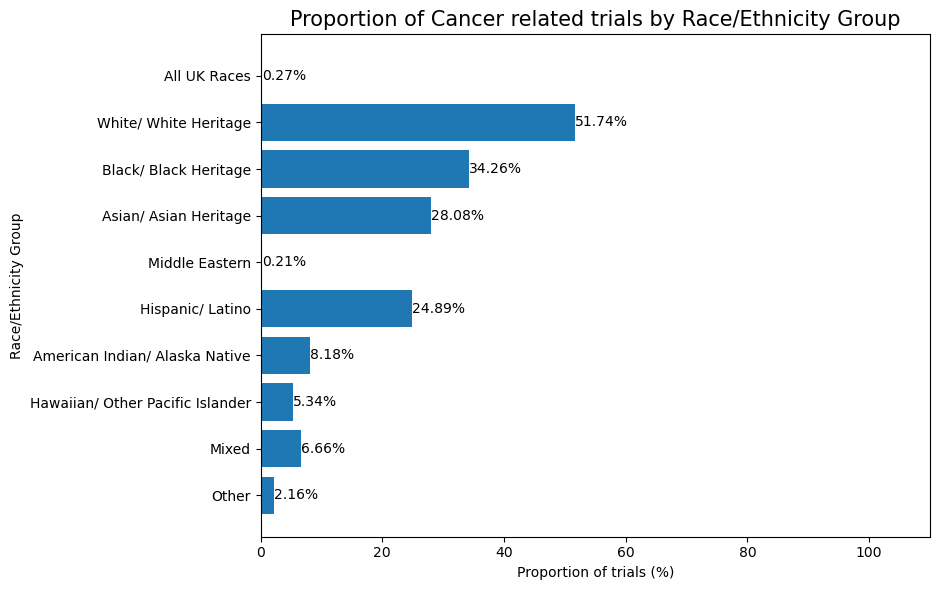

In [256]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(cancer_race_table_sorted['Race'], cancer_race_table_sorted['Proportion of trials (%)'])

# Customize the plot
plt.title('Proportion of Cancer related trials by Race/Ethnicity Group', fontsize=15)
plt.ylabel('Race/Ethnicity Group')
plt.xlabel('Proportion of trials (%)')
plt.xticks(rotation=0)
plt.xlim(0, 110)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

# Change the label for 'uk_races_dum'
plt.yticks(range(len(cancer_race_table_sorted)), ['Other', 'Mixed', 'Hawaiian/ Other Pacific Islander', 'American Indian/ Alaska Native',
              'Hispanic/ Latino', 'Middle Eastern', 'Asian/ Asian Heritage', 'Black/ Black Heritage',
              'White/ White Heritage', 'All UK Races'])

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/world/cancer_proportion_horizontal_barchart.png', dpi=300)

# Display the plot
plt.show()

In [257]:
# Create a copy of the cancer_race DataFrame
cancer_race_dummy = cancer_race.copy()

# Create dummy variables for cancer-related terms in the title and description columns
for term in cancer_terms:
    cancer_race_dummy[f'dummy_{term}'] = cancer_race_dummy['brief_title'].str.contains(term, case=False) | cancer_race_dummy['official_title'].str.contains(term, case=False)
    cancer_race_dummy[f'dummy_{term}'] = cancer_race_dummy[f'dummy_{term}'].astype(int)

/tmp/ipykernel_138/997304004.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [258]:
# Create an empty dataframe
cancer_terms_df = pd.DataFrame()

# Extract the columns corresponding to the cancer_terms
for term in cancer_terms:
    column_name = f'dummy_{term}'
    cancer_terms_df[column_name] = cancer_race_dummy[column_name]

# Display the resulting datafram
cancer_terms_df

dummy_cancer  dummy_tumor  dummy_tumour  dummy_carcinoma  \
0                1            0             0                0   
1                0            1             0                0   
2                1            0             0                0   
3                1            0             0                0   
4                0            0             0                1   
...            ...          ...           ...              ...   
5130             1            0             0                0   
5131             1            0             0                0   
5132             0            1             0                0   
5133             1            0             0                0   
5134             0            0             0                1   

      dummy_lymphoma  dummy_leukemia  dummy_sarcoma  dummy_glioblastoma  \
0                  0               0              0                   0   
1                  0               0              0                   0   
2                  0               0              0                   0   
3                  0               0              0                   0   
4                  0               0              0                   0   
...              ...             ...            ...                 ...   
5130               0               0              0                   0   
5131               0               0              0                   0   
5132               0               0              1                   0   
5133               0               0              0                   0   
5134               0               0              0                   0   

      dummy_glioma  dummy_neuroblastoma  ...  dummy_edwig  dummy_schwannoma  \
0                0                    0  ...            0                 0   
1                0                    0  ...            0                 0   
2                0                    0  ...            0                 0   
3                0                    0  ...            0                 0   
4                0                    0  ...            0                 0   
...            ...                  ...  ...          ...               ...   
5130             0                    0  ...            0                 0   
5131             0                    0  ...            0                 0   
5132             0                    0  ...            0                 0   
5133             0                    0  ...            0                 0   
5134             0                    0  ...            0                 0   

      dummy_verner-morrison  dummy_waldenström  dummy_von recklinghausen  \
0                         0                  0                         0   
1                         0                  0                         0   
2                         0                  0                         0   
3                         0                  0                         0   
4                         0                  0                         0   
...                     ...                ...                       ...   
5130                      0                  0                         0   
5131                      0                  0                         0   
5132                      0                  0                         0   
5133                      0                  0                         0   
5134                      0                  0                         0   

      dummy_von hippel-lindau  dummy_peutz-jeghers  \
0                           0                    0   
1                           0                    0   
2                           0                    0   
3                           0                    0   
4                           0                    0   
...                       ...                  ...   
5130                        0                    0   
5131              

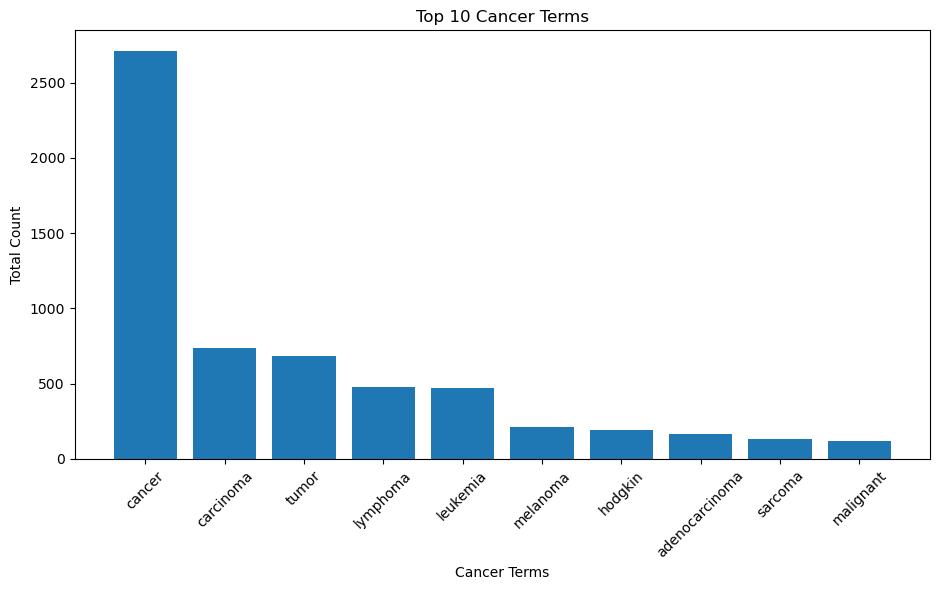

In [259]:
# Calculate the total count for each column
column_totals = cancer_terms_df.sum()

# Sort the columns by total count in descending order
sorted_columns = column_totals.sort_values(ascending=False)

# Select the top 10 columns
top_10_columns = sorted_columns[:10]

# Remove the "dummy_" part from the column names
column_labels = [col.replace('dummy_', '') for col in top_10_columns.index]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(column_labels, top_10_columns.values)

# Customize the plot
plt.title('Top 10 Cancer Terms')
plt.xlabel('Cancer Terms')
plt.ylabel('Total Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/world/cancer_terms.png', dpi=300)

# Display the plot
plt.show()

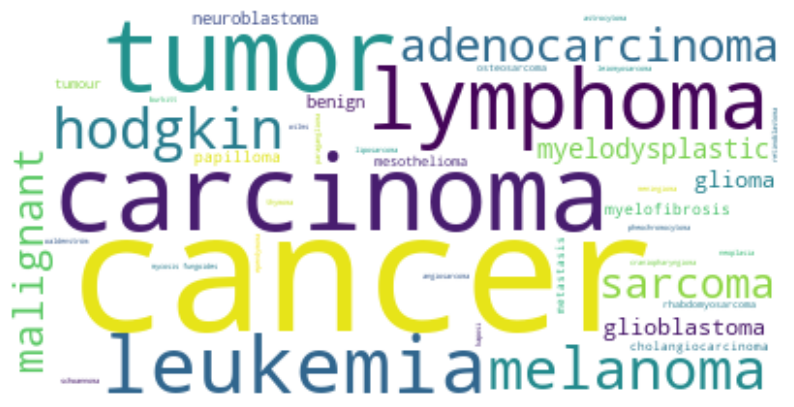

In [260]:
# Preprocess the word labels by removing the "dummy_" part
word_labels = column_totals.index.str.replace('dummy_', '')

# Create a dictionary of word labels and their corresponding counts
word_dict = dict(zip(word_labels, column_totals.values))

# Generate the word cloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Most Frequent terms for Cancer')

# Save the chart as an image file
plt.savefig('/project/world/cancer_wordcloud.png', dpi=300)

plt.show()

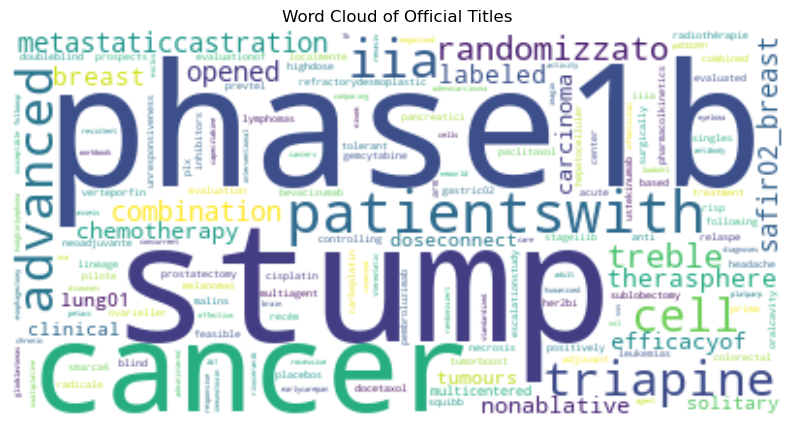

In [261]:
# Create a copy of the dataframe with only the relevant column
df_text = cancer_df[['official_title']].copy()

# Replace missing values with empty strings
df_text['official_title'].fillna('', inplace=True)

# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_text['official_title'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove irrelevant words
irrelevant_words = ['study', 'phase', 'randomized', 'controlled', 'trial']
feature_names = [word for word in feature_names if word not in irrelevant_words]

# Calculate the TF-IDF scores for each word
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

# Create a dictionary of word frequencies
word_frequencies = dict(zip(feature_names, tfidf_scores))

# Create a word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate_from_frequencies(word_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Official Titles')
plt.show()